# **Mount Google Drive**

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Install libraries for a Machine Learning approach**

In [7]:
!pip install pandas
!pip install scikit-learn
!pip install nltk
!pip install matplotlib
!pip install gensim
!pip install tqdm
!pip install seaborn

***Load english_news.csv***

In [ ]:
import pandas as pd

# File with space delimiter
en_dataset = pd.read_csv('/content/drive/MyDrive/Analisi/archive/english_news.csv', encoding='utf-8', delimiter='\t')

***Print Dataset***

In [ ]:
en_dataset

,source,date,title,author,text
0,Mainichi Shimbun,2021-12-06,"Editorial: Japan govt's 20,000-yen handout mis...",NaN,The Japanese government is trying to boost the...
1,Mainichi Shimbun,2021-12-07,Editorial: Time for Japan PM Kishida to delive...,NaN,"Prime Minister Fumio Kishida, who won a public..."
2,Mainichi Shimbun,2021-12-08,"Editorial: 80 years on from Pearl Harbor, acti...",NaN,It has been 80 years since the start of the Pa...
3,Mainichi Shimbun,2021-12-08,"Yoroku: 80 years later, many lessons still not...",NaN,"""The world has changed completely. The era was..."
4,Mainichi Shimbun,2021-12-08,Promoting respect for human rights behind US '...,NaN,The U.S. administration under President Joe Bi...
...,...,...,...,...,...
36884,The Japan Times,2021-06-06,COVID-19 tracker: Tokyo reports 351 new cases ...,NaN,Tokyo confirmed 351 new cases of COVID-19 on S...
36885,The Japan Times,2021-06-07,Dollar weakens to around ¥109.40 in Tokyo,NaN,The dollar eased to around ¥109.40 in Tokyo tr...
36886,The Japan Times,2021-06-07,"Nikkei ends higher, but gains limited",NaN,The benchmark Nikkei average turned higher on ...
36887,The Japan Times,2021-06-07,COVID-19 tracker: Osaka reports 72 new cases b...,NaN,Osaka Prefecture reported 72 new COVID-19 case...


There are some records with NaN value, I analyze them

In [ ]:
# Len dataset with not NaN value in "Author" column
records_author = len(en_dataset.loc[en_dataset.iloc[:, 3].notna()])

# Print % of NaN value
print(records_author/len(en_dataset)*100)

34.82338908617745


About 35% of the data have nonzero values in the author field. I would avoid deleting these records because there are quite a few.

I analyze the authors to see if it makes sense to use the mode:

# **Plot Author**

In [ ]:
import matplotlib.pyplot as plt

# Filters the DataFrame by excluding records with author name NaN
filtered_dataset = en_dataset.dropna(subset=['author'])

# Count the number of authors and their count in the filtered author
count_authors = filtered_dataset['author'].value_counts()

print(count_authors)

Philip Brasor                        318
Kumi Kinohara                        288
Rowan Hooper                         251
Angela Jeffs                         186
Reiji Yoshida                        176
                                    ... 
Rintaro Sawano                         1
Gyo Hani                               1
Mayumi Negishi and Akemi Nakamura      1
Jaosn Jenkins                          1
Brian K. Sullivan                      1
Name: author, Length: 1318, dtype: int64


Too many authors to plot a graph well, I make a selection with top N authors

1° Graph

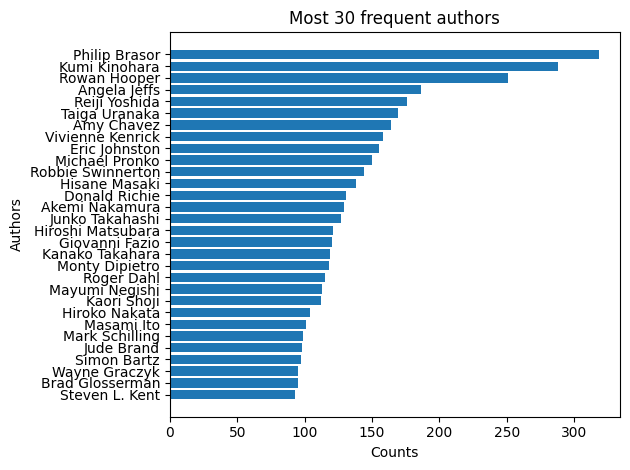

In [ ]:
n_authors = 30

# The N most frequent authors
top_authors = count_authors.head(n_authors)

# Sort authors
top_authors = top_authors.sort_values(ascending=True)

# Create horizontal bar graph with ordered bars
plt.barh(top_authors.index, top_authors.values)
plt.xlabel('Counts')
plt.ylabel('Authors')
plt.title('Most {} frequent authors'.format(n_authors))
plt.tight_layout()
plt.show()

2° Graph

<ipython-input-48-386501cf1372>:8: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  count_categories = top_categories.append(pd.Series([sum_resto], index=['Other']))


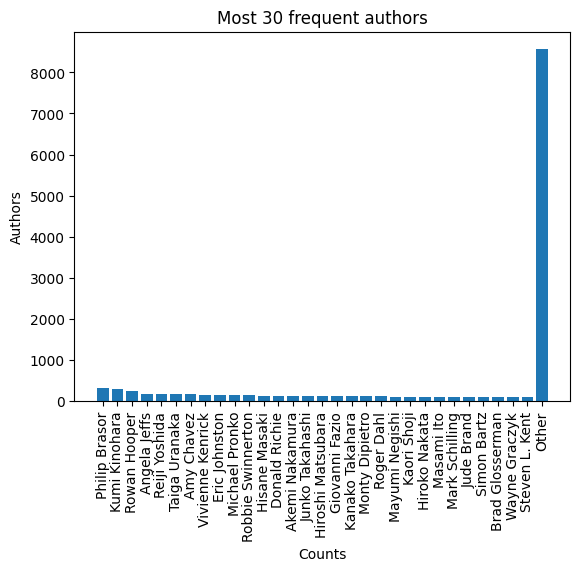

In [ ]:
# The N most frequent authors
top_categories = count_authors.head(n_authors)

# Other category
sum_resto = count_authors.iloc[n_authors:].sum()

# Create a new count with the first N categories and the rest grouped as "Other"
count_categories = top_categories.append(pd.Series([sum_resto], index=['Other']))

# Create bar graph
plt.bar(count_categories.index, count_categories.values)
plt.xlabel('Counts')
plt.ylabel('Authors')
plt.title('Most {} frequent authors'.format(n_authors))
plt.xticks(rotation=90)
plt.show()

3° Graph using all authors with WordCloud

In [ ]:
!pip install wordcloud

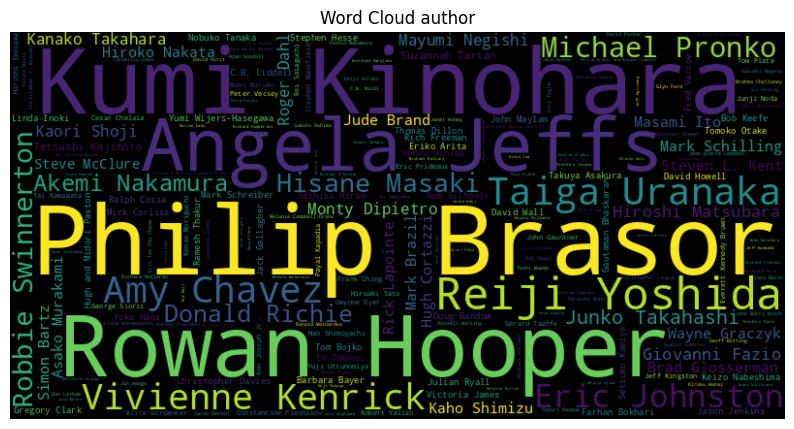

In [ ]:
from wordcloud import WordCloud

filtered_dataset = en_dataset.dropna(subset=['author'])

count_authors = filtered_dataset['author'].value_counts()

# Make WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='black').generate_from_frequencies(count_authors)

# Visual WordCloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud author')
plt.show()

Plot all the different authors in the dataset by staggering them into blocks using numpy.

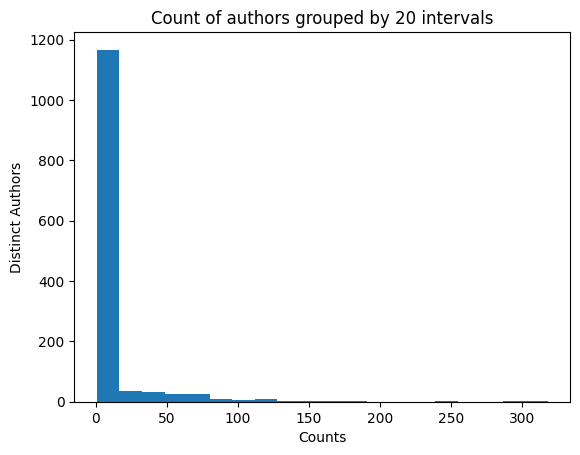

In [ ]:
import numpy as np

filtered_dataset = en_dataset.dropna(subset=['author'])

count_authors = filtered_dataset['author'].value_counts()

intervals = 20

# Calculates intervals based on author count
_, bins = np.histogram(count_authors, bins=intervals)

# Make a graph
plt.hist(count_authors, bins=bins)
plt.xlabel('Counts')
plt.ylabel('Distinct Authors')
plt.title('Count of authors grouped by {} intervals'.format(intervals))
plt.show()

Analyzing the graph, it is evident that there is dispersion in the dataset as the range between 0 and 15 equal author counts (out of 12000 records) represents almost all of the distinct authors in the dataset.
So one can imagine that there are several records having very few texts written by all different authors.

Let us take a closer look at the above interval

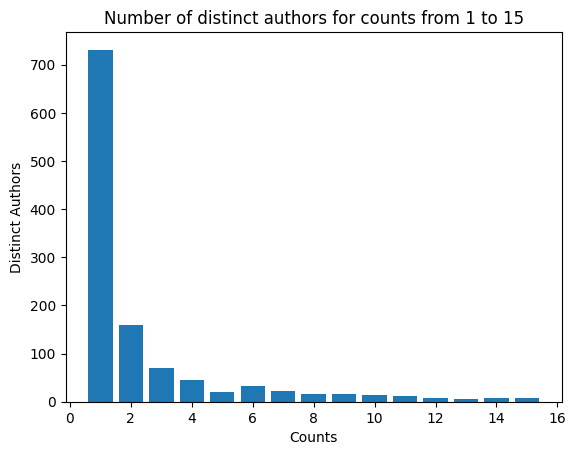

In [ ]:
x_values = list(range(1, 16))

# Creates the list of y with the corresponding number of distinct authors for each value of x
y_values = [count_authors[count_authors == i].size for i in x_values]

plt.bar(x_values, y_values)
plt.xlabel('Counts')
plt.ylabel('Distinct Authors')
plt.title('Number of distinct authors for counts from 1 to 15')
plt.show()

In [ ]:
# Filter author
authors_count_one = len(count_authors[count_authors == 1])
print("Number of authors appearing only once:", authors_count_one)
print("% Of authors appearing only once in the dataset:", (authors_count_one/len(count_authors))*100)


authors_count_two = len(count_authors[count_authors == 2])
print("Number of authors appearing only once:", authors_count_two)
print("% Of authors appearing only once in the dataset:", (authors_count_two/len(count_authors))*100)


authors_count_three = len(count_authors[count_authors == 3])
print("Number of authors appearing only once:", authors_count_three)
print("% Of authors appearing only once in the dataset:", (authors_count_three/len(count_authors))*100)

Number of authors appearing only once: 731
% Of authors appearing only once in the dataset: 55.46282245827011
Number of authors appearing only once: 160
% Of authors appearing only once in the dataset: 12.139605462822459
Number of authors appearing only once: 69
% Of authors appearing only once in the dataset: 5.235204855842185


From what has been seen, there is a 55% of authors appearing only once in the dataset.
12% appearing twice , 5% appearing three times and so on.

So > 70% are the authors in the dataset who appear between 1 and 3 times.

Therefore it is useless and forivious to calculate the fashion and therefore I prefer to keep the records with NaN value to the author without changing anything in the dataset.

# **Analysis Classes**

In [ ]:
en_dataset = pd.read_csv('/content/drive/MyDrive/Analisi/archive/english_news.csv', encoding='utf-8', delimiter='\t')

# Count the number of articles
count_source = en_dataset['source'].value_counts()

print(count_source)

The Japan Times     36815
Mainichi Shimbun       74
Name: source, dtype: int64


Plot Graph

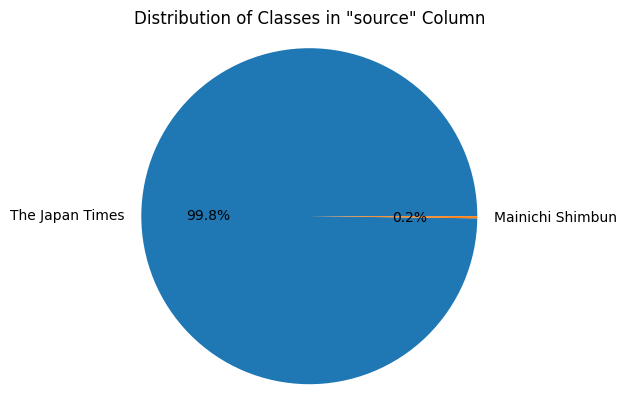

In [ ]:
plt.pie(count_source, labels=count_source.index, autopct='%1.1f%%')
plt.title('Distribution of Classes in "source" Column')
plt.axis('equal')
plt.show()

The dataset is completely unbalanced

In [ ]:
# Drop NaN value
filtered_dataset = en_dataset.dropna(subset=['author'])
count_source_filtered = filtered_dataset['source'].value_counts()

print(count_source_filtered)

The Japan Times     12845
Mainichi Shimbun        1
Name: source, dtype: int64


As can be seen if we remove the records with NaN to author, the minority class disappears.

Therefore we can think of the minority class (Mainichi Shimbun) as depending on the author specification making this feature very important and discriminating.

So one can think of giving more weight to this feature and clearly not removing records with NaN to author

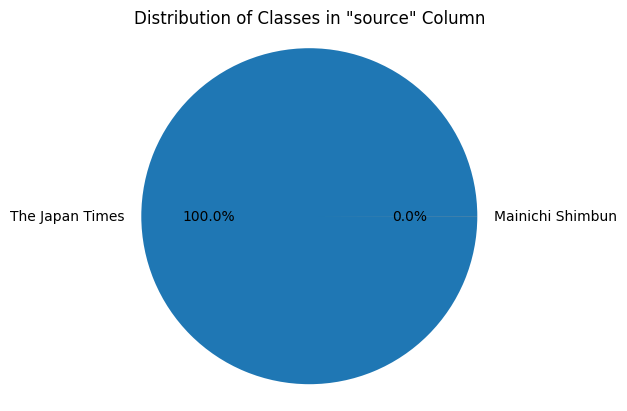

In [ ]:
plt.pie(count_source_filtered, labels=count_source_filtered.index, autopct='%1.1f%%')
plt.title('Distribution of Classes in "source" Column')
plt.axis('equal')
plt.show()

# **1ST Approach: Oversampling & Undersampling**

**Oversampling**

In [ ]:
!pip install imbalanced-learn

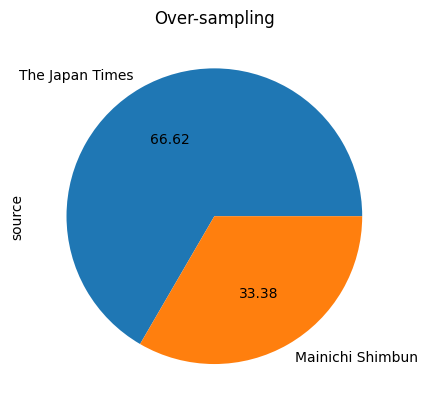

In [ ]:
from imblearn.over_sampling import RandomOverSampler

df = pd.read_csv('/content/drive/MyDrive/Analisi/archive/english_news.csv', encoding='utf-8', delimiter='\t')

X = df.drop(['source'], axis=1)
y = df['source']

# Calculate the proportion for the minority class
minority_proportion = 0.5

# Calculate the number of samples for the minority class
minority_samples = int(len(y) * minority_proportion)

oversampler = RandomOverSampler(sampling_strategy={'Mainichi Shimbun': minority_samples})
X_res, y_res = oversampler.fit_resample(X, y)

ax = y_res.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("Over-sampling")

In [ ]:
print(y_res.value_counts())

The Japan Times     36815
Mainichi Shimbun    18444
Name: source, dtype: int64


**Merge X and y with Over-sampling**

In [ ]:
df_comb = pd.concat([X_res, y_res], axis=1)
df_comb.to_csv('/content/drive/MyDrive/Analisi/ModellingDataset/over_english_news.csv', sep='\t', index=False)

Check NaN author

In [ ]:
filtered_dataset_text = df_comb.dropna(subset=['author'])
print(filtered_dataset_text['source'].value_counts())

The Japan Times     12845
Mainichi Shimbun      240
Name: source, dtype: int64


Is probably the best choice as it maintains the ratio of NaNs.

There is only the question of whether too many examples will produce overfitting for the model

**Undersampling**

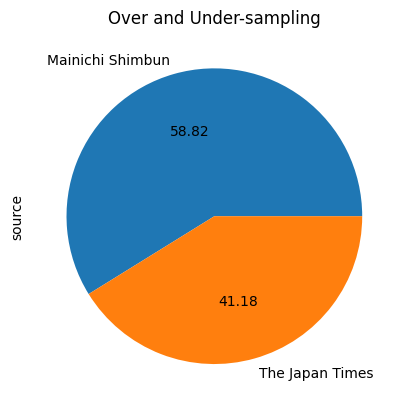

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

# Calculate the number of samples to keep for the majority class
majority_samples = int(len(y) * 0.35)

# Randomly undersample the majority class
undersampler = RandomUnderSampler(sampling_strategy={'The Japan Times': majority_samples})
X_res2, y_res2 = undersampler.fit_resample(X_res, y_res)

ax = y_res2.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("Over and Under-sampling")

In [ ]:
print(y_res2.value_counts())

Mainichi Shimbun    18444
The Japan Times     12911
Name: source, dtype: int64


**Merge X and y with Over and Sub sampling**

In [ ]:
# Combine the X_res2 and y_res2 dataframes
df_combined = pd.concat([X_res2, y_res2], axis=1)

# Save the combined dataframe to a CSV file
df_combined.to_csv('/content/drive/MyDrive/Analisi/ModellingDataset/sub_over_english_news.csv', sep='\t', index=False)

In [ ]:
df_over_sub = df_combined
df_over_sub

,date,title,author,text,source
0,2021-12-06,"Editorial: Japan govt's 20,000-yen handout mis...",NaN,The Japanese government is trying to boost the...,Mainichi Shimbun
1,2021-12-07,Editorial: Time for Japan PM Kishida to delive...,NaN,"Prime Minister Fumio Kishida, who won a public...",Mainichi Shimbun
2,2021-12-08,"Editorial: 80 years on from Pearl Harbor, acti...",NaN,It has been 80 years since the start of the Pa...,Mainichi Shimbun
3,2021-12-08,"Yoroku: 80 years later, many lessons still not...",NaN,"""The world has changed completely. The era was...",Mainichi Shimbun
4,2021-12-08,Promoting respect for human rights behind US '...,NaN,The U.S. administration under President Joe Bi...,Mainichi Shimbun
...,...,...,...,...,...
31350,2002-02-07,75% foresee Snow Brand doom: poll,NaN,Seventy-five percent of respondents to a recen...,The Japan Times
31351,2019-01-15,Germany sees weakest growth in five years amid...,NaN,BERLIN –The German economy grew by 1.5 percent...,The Japan Times
31352,2001-06-07,"Banks need strong medicine to recover ratings,...",NaN,Standard & Poor’s Corp. said Wednesday that th...,The Japan Times
31353,2010-01-10,Kremlin two-step: modernize or marginalize,Dmitri Trenin,MOSCOW — Westerners often see Russian politics...,The Japan Times


Check NaN author

In [ ]:
filtered_dataset_text = df_over_sub.dropna(subset=['author'])
print(filtered_dataset_text['source'].value_counts())

The Japan Times     4489
Mainichi Shimbun     260
Name: source, dtype: int64


Although there are a higher number of records with the minority class and a lower number of examples in general, the ratio to NaN values is significantly lower.

This could be a problem at the model discrimination stage.

# **2ST Approach: Pre-Processing and Embedding**

**Create a class preprocessing**

Since we are talking about text, it is useless to scale the data since the features in the dataset are not numeric.

Rather, it makes sense to leverage NLP and embedding techniques

In [107]:
from sklearn.preprocessing import LabelEncoder
import gensim.downloader
from gensim.models import KeyedVectors
import numpy as np
import nltk
from nltk.stem import PorterStemmer
from tqdm import tqdm

class PreProcessing():

    def __init__(self, datasetpath):
        self.data_frame = pd.read_csv(f'/content/drive/MyDrive/Analisi/{datasetpath}', encoding='utf-8', delimiter='\t')
        # Remove records where the text field is null because they are useless
        self.data_frame = self.data_frame.dropna(subset=['text'])

    def preprocess_data(self):
        self.data_frame['date'] = pd.to_datetime(self.data_frame['date'])
        # Extract the day, month and year from the 'date' column
        self.data_frame.insert(2, 'Day', self.data_frame['date'].dt.day)
        self.data_frame.insert(3, 'Month', self.data_frame['date'].dt.month)
        self.data_frame.insert(4, 'Year', self.data_frame['date'].dt.year)

        # Determines whether the date is a weekend (0 = no weekend, 1 = weekend)
        self.data_frame.insert(5, 'Weekend', self.data_frame['date'].dt.dayofweek.isin([5, 6]).astype(int))
        self.data_frame = self.data_frame.drop('date', axis=1)

        return self

    def one_hot_encoding(self):
        # Create an instance of the LabelEncoder.
        label_encoder = LabelEncoder()

        # Perform encoding of target variable y
        self.data_frame['source_encoded'] = label_encoder.fit_transform(self.data_frame['source'])

        self.data_frame = self.data_frame.drop('source', axis=1)

        return self.data_frame

    def embedding_dataset(self, model, merge, stemming, aggregation_func=np.mean):

        # Function to get text embeddings using the pre-trained template.
        def get_embedding(text, stemming):
            # Split text
            words = text.lower().split()

            if stemming:
              # Initialize stemmer
              stemmer = PorterStemmer()
              # Apply stemming to each word
              words = [stemmer.stem(word) for word in words]

            # Generate embedding
            embedding = [pre_trained_model[word] for word in words if word in pre_trained_model]
            # Average Embedding
            return aggregation_func(embedding, axis=0) if embedding else np.zeros(300)

        # Load Model
        pre_trained_model = None
        with tqdm(total=1, desc="Loading Model", bar_format='{desc}: {percentage:3.0f}%|{bar}|') as pbar:
            pre_trained_model = KeyedVectors.load(f'/content/drive/MyDrive/Analisi/{model}')
            pbar.update(1)
        print('------------------------------------ Loading Finished ------------------------------------')
        # Copy Dataset
        df = self.data_frame.copy()
        # Fill NaN value with Null
        df.fillna('Null', inplace=True)

        if merge:
          # Merge text columns into a single text for each record
          df['combined_text'] = df['Day'].astype(str) + ' ' + df['Month'].astype(str) + ' ' + df['Year'].astype(str) + ' ' + df['Weekend'].astype(str) + ' ' + df['author'] + ' ' + df['title'] + ' ' + df['text']
          df = df.drop(['Day', 'Month', 'Year', 'Weekend', 'author'], axis=1)
          # Apply get_embedding function to 'combined_text' column to get embeds
          df['embedding'] = df['combined_text'].apply(lambda x: get_embedding(x, stemming))
        else:
          df['embedding_title'] = df['title'].apply(lambda x: get_embedding(x, stemming))
          df['embedding_text'] = df['text'].apply(lambda x: get_embedding(x, stemming))

        df = df.drop(['title', 'text'], axis=1)


        return df


    def apply_preprocessing(self, aggregation_func=np.mean, model='word2vec-google-news-300', embedding=False, merge=False, stemming=False):
        self.preprocess_data()
        self.one_hot_encoding()
        if embedding:
          self.data_frame = self.embedding_dataset(model=model, merge=merge, stemming=stemming, aggregation_func=aggregation_func)

        return self

In [ ]:
preprocessor = PreProcessing('ModellingDataset/archive/english_news.csv')

In [ ]:
preprocessed_df = preprocessor.apply_preprocessing(embedding=True, merge=True)

Loading Model: 100%|██████████|


------------------------------------ Loading Finished ------------------------------------


Print dataset

In [ ]:
preprocessed_df.data_frame

,source_encoded,combined_text,embedding
0,0,"6 12 2021 0 Null Editorial: Japan govt's 20,00...","[0.032542355, 0.027970003, 0.03508352, 0.07711..."
1,0,7 12 2021 0 Null Editorial: Time for Japan PM ...,"[0.024977813, 0.045055438, 0.03429468, 0.06285..."
2,0,8 12 2021 0 Null Editorial: 80 years on from P...,"[0.037099693, 0.0689596, 0.04459567, 0.0789173..."
3,0,"8 12 2021 0 Null Yoroku: 80 years later, many ...","[0.036359034, 0.052251473, 0.05680519, 0.06371..."
4,0,8 12 2021 0 Null Promoting respect for human r...,"[0.007400545, 0.043460358, 0.05484787, 0.09326..."
...,...,...,...
55254,0,27 9 2021 0 Null Rolling Stones open American ...,"[0.051411595, 0.050292857, 0.027858062, 0.0896..."
55255,0,"8 12 2021 0 Null Yoroku: 80 years later, many ...","[0.036359034, 0.052251473, 0.05680519, 0.06371..."
55256,0,"29 4 2021 0 Null Astronaut Michael Collins, Ap...","[0.028544772, 0.056969117, 0.042920016, 0.0800..."
55257,0,30 12 2021 0 Null News Navigator: What is the ...,"[0.025600035, 0.0336872, 0.051781334, 0.072479..."


**Smote**

In [ ]:
preprocessor2 = PreProcessing('archive/english_news.csv')
preprocessed_smote = preprocessor2.apply_preprocessing(embedding=True, merge=True)

Loading Model: 100%|██████████|


------------------------------------ Loading Finished ------------------------------------


In [ ]:
preprocessed_smote.data_frame

,source_encoded,combined_text,embedding
0,0,"6 12 2021 0 Null Editorial: Japan govt's 20,00...","[0.032542355, 0.027970003, 0.03508352, 0.07711..."
1,0,7 12 2021 0 Null Editorial: Time for Japan PM ...,"[0.024977813, 0.045055438, 0.03429468, 0.06285..."
2,0,8 12 2021 0 Null Editorial: 80 years on from P...,"[0.037099693, 0.0689596, 0.04459567, 0.0789173..."
3,0,"8 12 2021 0 Null Yoroku: 80 years later, many ...","[0.036359034, 0.052251473, 0.05680519, 0.06371..."
4,0,8 12 2021 0 Null Promoting respect for human r...,"[0.007400545, 0.043460358, 0.05484787, 0.09326..."
...,...,...,...
36884,1,6 6 2021 1 Null COVID-19 tracker: Tokyo report...,"[0.03910786, 0.03486884, 0.04953557, 0.0880724..."
36885,1,7 6 2021 0 Null Dollar weakens to around ¥109....,"[0.030214077, 0.008396532, 0.052077968, 0.0946..."
36886,1,"7 6 2021 0 Null Nikkei ends higher, but gains ...","[0.022791486, 0.034770265, 0.036485627, 0.1026..."
36887,1,7 6 2021 0 Null COVID-19 tracker: Osaka report...,"[0.031963546, 0.04686745, 0.03980955, 0.077086..."


In [ ]:
X = preprocessed_smote.data_frame['embedding']
y = preprocessed_smote.data_frame['source_encoded']

In [ ]:
print(X)
print(y)

0        [0.032542355, 0.027970003, 0.03508352, 0.07711...
1        [0.024977813, 0.045055438, 0.03429468, 0.06285...
2        [0.037099693, 0.0689596, 0.04459567, 0.0789173...
3        [0.036359034, 0.052251473, 0.05680519, 0.06371...
4        [0.007400545, 0.043460358, 0.05484787, 0.09326...
                               ...                        
36884    [0.03910786, 0.03486884, 0.04953557, 0.0880724...
36885    [0.030214077, 0.008396532, 0.052077968, 0.0946...
36886    [0.022791486, 0.034770265, 0.036485627, 0.1026...
36887    [0.031963546, 0.04686745, 0.03980955, 0.077086...
36888    [0.06399234, 0.038974818, 0.049153887, 0.11442...
Name: embedding, Length: 36766, dtype: object
0        0
1        0
2        0
3        0
4        0
        ..
36884    1
36885    1
36886    1
36887    1
36888    1
Name: source_encoded, Length: 36766, dtype: int64


In [ ]:
from imblearn.over_sampling import SMOTE
import numpy as np

# Concatenate embedding arrays vertically.
X_embedding_concatenated = np.vstack(X)
# Apply SMOTE to the reformatted dataset.
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X_embedding_concatenated, y)


In [ ]:
print(len(X_resampled))

73384


In [ ]:
print(y_resampled.value_counts())

0    36692
1    36692
Name: source_encoded, dtype: int64


Class visualization

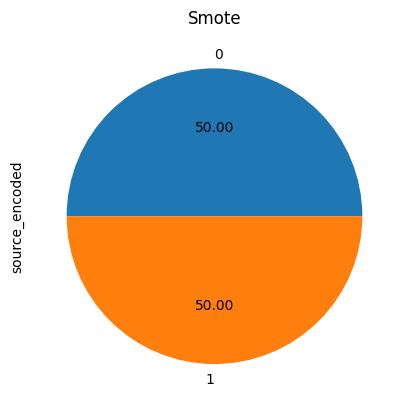

In [ ]:
ax = y_resampled.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("Smote")

New dataset creation

In [ ]:
# Concatenates the embedding into a single array.
embedding_column = np.array([embedding.flatten() for embedding in X_resampled])
# Create the df_resampled DataFrame with the embedding column and the target
df_resampled = pd.DataFrame({'embedding': embedding_column.tolist(), 'target': y_resampled})

# Save the combined dataframe to a CSV file
df_resampled.to_csv('/content/drive/MyDrive/Analisi/ModellingDataset/smote_english_news.csv', sep='\t', index=False)

In [ ]:
df_resampled

,embedding,target
0,"[0.032542355358600616, 0.027970002964138985, 0...",0
1,"[0.02497781254351139, 0.045055437833070755, 0....",0
2,"[0.0370996929705143, 0.06895960122346878, 0.04...",0
3,"[0.0363590344786644, 0.05225147306919098, 0.05...",0
4,"[0.007400544825941324, 0.043460357934236526, 0...",0
...,...,...
73379,"[0.047658998519182205, 0.03485313057899475, 0....",0
73380,"[0.04660592973232269, 0.043077219277620316, 0....",0
73381,"[0.022293047979474068, 0.04708254337310791, 0....",0
73382,"[0.013103192672133446, 0.046897269785404205, 0...",0


**Save dataset using various pre-processing techniques**

In [ ]:
df_resampled.to_csv('/content/drive/MyDrive/Analisi/SavedEmbeddingModels/smote_english_news.csv', sep='\t', index=False)

In [ ]:
pre_over = PreProcessing('ModellingDataset/over_english_news.csv')
preprocessed_over = pre_over.apply_preprocessing(embedding=True, merge=True)
preprocessed_over.data_frame.to_csv('/content/drive/MyDrive/Analisi/SavedEmbeddingModels/embedding_over_english_news.csv', sep='\t', index=False)

Loading Model: 100%|██████████|


------------------------------------ Loading Finished ------------------------------------


In [ ]:
print(preprocessed_over.data_frame)

       source_encoded                                      combined_text  \
0                   0  6 12 2021 0 Null Editorial: Japan govt's 20,00...   
1                   0  7 12 2021 0 Null Editorial: Time for Japan PM ...   
2                   0  8 12 2021 0 Null Editorial: 80 years on from P...   
3                   0  8 12 2021 0 Null Yoroku: 80 years later, many ...   
4                   0  8 12 2021 0 Null Promoting respect for human r...   
...               ...                                                ...   
55254               0  27 9 2021 0 Null Rolling Stones open American ...   
55255               0  8 12 2021 0 Null Yoroku: 80 years later, many ...   
55256               0  29 4 2021 0 Null Astronaut Michael Collins, Ap...   
55257               0  30 12 2021 0 Null News Navigator: What is the ...   
55258               0  24 12 2021 0 Null Editorial: Japan needs flexi...   

                                               embedding  
0      [0.032542355, 0.02797

In [ ]:
pre_over_no_merge = PreProcessing('ModellingDataset/over_english_news.csv')
preprocessed_over_no_merge = pre_over_no_merge.apply_preprocessing(embedding=True)
preprocessed_over_no_merge.data_frame.to_csv('/content/drive/MyDrive/Analisi/SavedEmbeddingModels/no_merge_embedding_over_english_news.csv', sep='\t', index=False)

Loading Model: 100%|██████████|


------------------------------------ Loading Finished ------------------------------------


In [ ]:
preprocessed_over_no_merge.data_frame

,Day,Month,Year,Weekend,author,source_encoded,embedding_title,embedding_text
0,6,12,2021,0,Null,0,"[0.103773326, 0.025831435, -0.009120094, 0.150...","[0.030954631, 0.029229403, 0.03529097, 0.07662..."
1,7,12,2021,0,Null,0,"[-0.05770874, 0.0067952476, -0.0011698405, 0.1...","[0.026003977, 0.047311023, 0.03411502, 0.06322..."
2,8,12,2021,0,Null,0,"[0.10662842, 0.112958625, -0.0075897216, 0.028...","[0.03511288, 0.069618315, 0.045195017, 0.08143..."
3,8,12,2021,0,Null,0,"[0.06624756, 0.08993006, 0.025256347, 0.007104...","[0.035286985, 0.053041246, 0.05697503, 0.06662..."
4,8,12,2021,0,Null,0,"[-0.012871636, 0.06580268, 0.10623678, 0.09874...","[0.0074857324, 0.04434368, 0.053283043, 0.0942..."
...,...,...,...,...,...,...,...,...
55254,27,9,2021,0,Null,0,"[0.047319684, 0.10479736, 0.06626674, 0.289899...","[0.051424585, 0.050854344, 0.026309414, 0.0872..."
55255,8,12,2021,0,Null,0,"[0.06624756, 0.08993006, 0.025256347, 0.007104...","[0.035286985, 0.053041246, 0.05697503, 0.06662..."
55256,29,4,2021,0,Null,0,"[-0.05082194, 0.115478516, -0.023254395, 0.201...","[0.029065574, 0.057312462, 0.04302304, 0.07973..."
55257,30,12,2021,0,Null,0,"[0.0075653074, 0.05380249, 0.017199706, 0.0222...","[0.026219266, 0.034617145, 0.051954452, 0.0753..."


In [ ]:
pre_over_no_merge_stemming = PreProcessing('ModellingDataset/over_english_news.csv')
preprocessed_over_no_merge_stemming = pre_over_no_merge_stemming.apply_preprocessing(embedding=True, stemming=True)
preprocessed_over_no_merge_stemming.data_frame.to_csv('/content/drive/MyDrive/Analisi/SavedEmbeddingModels/no_merge_stemming_embedding_over_english_news.csv', sep='\t', index=False)

Loading Model: 100%|██████████|


------------------------------------ Loading Finished ------------------------------------


In [ ]:
preprocessed_over_no_merge_stemming.data_frame

,Day,Month,Year,Weekend,author,source_encoded,embedding_title,embedding_text
0,6,12,2021,0,Null,0,"[0.107162476, 0.0065231323, 0.045434475, 0.200...","[0.02217065, 0.016255382, 0.04184011, 0.077096..."
1,7,12,2021,0,Null,0,"[-0.08265177, 0.025939941, -0.011260986, 0.140...","[0.00908493, 0.048466265, 0.034958333, 0.07696..."
2,8,12,2021,0,Null,0,"[0.13063964, 0.11083384, 0.0023239136, 0.07517...","[0.025454234, 0.058136564, 0.045115847, 0.0829..."
3,8,12,2021,0,Null,0,"[0.04140625, 0.09601526, 0.053956605, 0.031188...","[0.016954076, 0.05469251, 0.053264756, 0.06540..."
4,8,12,2021,0,Null,0,"[0.03615025, 0.031991143, 0.090412684, 0.10115...","[0.0076259724, 0.037461273, 0.050403677, 0.088..."
...,...,...,...,...,...,...,...,...
55254,27,9,2021,0,Null,0,"[0.016601562, 0.09447022, 0.061560057, 0.26738...","[0.03785124, 0.049876183, 0.018781193, 0.08239..."
55255,8,12,2021,0,Null,0,"[0.04140625, 0.09601526, 0.053956605, 0.031188...","[0.016954076, 0.05469251, 0.053264756, 0.06540..."
55256,29,4,2021,0,Null,0,"[-0.05082194, 0.115478516, -0.023254395, 0.201...","[0.016584905, 0.046711955, 0.041187666, 0.0813..."
55257,30,12,2021,0,Null,0,"[0.0063201906, 0.047161866, 0.01000824, 0.0419...","[0.019344619, 0.033703662, 0.03895932, 0.07981..."


In [ ]:
pre_sub_over = PreProcessing('ModellingDataset/sub_over_english_news.csv')
preprocessed_sub_over = pre_sub_over.apply_preprocessing(embedding=True, merge=True)
preprocessed_sub_over.data_frame.to_csv('/content/drive/MyDrive/Analisi/SavedEmbeddingModels/embedding_sub_over_english_news.csv', sep='\t', index=False)

Loading Model: 100%|██████████|


------------------------------------ Loading Finished ------------------------------------


In [ ]:
print(preprocessed_sub_over.data_frame)

       source_encoded                                      combined_text  \
0                   0  6 12 2021 0 Null Editorial: Japan govt's 20,00...   
1                   0  7 12 2021 0 Null Editorial: Time for Japan PM ...   
2                   0  8 12 2021 0 Null Editorial: 80 years on from P...   
3                   0  8 12 2021 0 Null Yoroku: 80 years later, many ...   
4                   0  8 12 2021 0 Null Promoting respect for human r...   
...               ...                                                ...   
31350               1  7 2 2002 0 Null 75% foresee Snow Brand doom: p...   
31351               1  15 1 2019 0 Null Germany sees weakest growth i...   
31352               1  7 6 2001 0 Null Banks need strong medicine to ...   
31353               1  10 1 2010 1 Dmitri Trenin Kremlin two-step: mo...   
31354               1  6 1 2003 0 Null Ferry adrift due to engine tro...   

                                               embedding  
0      [0.032542355, 0.02797

In [ ]:
pre_sub_over_no_merge = PreProcessing('ModellingDataset/sub_over_english_news.csv')
preprocessed_sub_over_no_merge = pre_sub_over_no_merge.apply_preprocessing(embedding=True)
preprocessed_sub_over_no_merge.data_frame.to_csv('/content/drive/MyDrive/Analisi/SavedEmbeddingModels/no_merge_embedding_sub_over_english_news.csv', sep='\t', index=False)

Loading Model: 100%|██████████|


------------------------------------ Loading Finished ------------------------------------


In [ ]:
preprocessed_sub_over_no_merge.data_frame

,Day,Month,Year,Weekend,author,source_encoded,embedding_title,embedding_text
0,6,12,2021,0,Null,0,"[0.103773326, 0.025831435, -0.009120094, 0.150...","[0.030954631, 0.029229403, 0.03529097, 0.07662..."
1,7,12,2021,0,Null,0,"[-0.05770874, 0.0067952476, -0.0011698405, 0.1...","[0.026003977, 0.047311023, 0.03411502, 0.06322..."
2,8,12,2021,0,Null,0,"[0.10662842, 0.112958625, -0.0075897216, 0.028...","[0.03511288, 0.069618315, 0.045195017, 0.08143..."
3,8,12,2021,0,Null,0,"[0.06624756, 0.08993006, 0.025256347, 0.007104...","[0.035286985, 0.053041246, 0.05697503, 0.06662..."
4,8,12,2021,0,Null,0,"[-0.012871636, 0.06580268, 0.10623678, 0.09874...","[0.0074857324, 0.04434368, 0.053283043, 0.0942..."
...,...,...,...,...,...,...,...,...
31350,7,2,2002,0,Null,1,"[0.117752075, 0.0057239532, -0.07272339, -0.00...","[0.050625946, 0.03935878, 0.033634968, 0.08975..."
31351,15,1,2019,0,Null,1,"[0.040496826, 0.009544373, 0.018096924, 0.1044...","[0.022373963, 0.045782164, 0.040827867, 0.1098..."
31352,7,6,2001,0,Null,1,"[-0.001953125, 0.11417643, -0.039438885, 0.099...","[0.023157142, 0.06060938, 0.03562918, 0.097534..."
31353,10,1,2010,1,Dmitri Trenin,1,"[-0.048957825, 0.074783325, 0.04437256, 0.1045...","[0.050180506, 0.04552281, 0.057387836, 0.14189..."


In [ ]:
pre_sub_over_no_merge_stemming = PreProcessing('ModellingDataset/sub_over_english_news.csv')
preprocessed_sub_over_no_merge_stemming = pre_sub_over_no_merge_stemming.apply_preprocessing(embedding=True, stemming=True)
preprocessed_sub_over_no_merge_stemming.data_frame.to_csv('/content/drive/MyDrive/Analisi/SavedEmbeddingModels/no_merge_stemming_embedding_sub_over_english_news.csv', sep='\t', index=False)

Loading Model: 100%|██████████|


------------------------------------ Loading Finished ------------------------------------


In [ ]:
preprocessed_sub_over_no_merge_stemming.data_frame

,Day,Month,Year,Weekend,author,source_encoded,embedding_title,embedding_text
0,6,12,2021,0,Null,0,"[0.107162476, 0.0065231323, 0.045434475, 0.200...","[0.02217065, 0.016255382, 0.04184011, 0.077096..."
1,7,12,2021,0,Null,0,"[-0.08265177, 0.025939941, -0.011260986, 0.140...","[0.00908493, 0.048466265, 0.034958333, 0.07696..."
2,8,12,2021,0,Null,0,"[0.13063964, 0.11083384, 0.0023239136, 0.07517...","[0.025454234, 0.058136564, 0.045115847, 0.0829..."
3,8,12,2021,0,Null,0,"[0.04140625, 0.09601526, 0.053956605, 0.031188...","[0.016954076, 0.05469251, 0.053264756, 0.06540..."
4,8,12,2021,0,Null,0,"[0.03615025, 0.031991143, 0.090412684, 0.10115...","[0.0076259724, 0.037461273, 0.050403677, 0.088..."
...,...,...,...,...,...,...,...,...
31350,7,2,2002,0,Null,1,"[0.17816162, 0.007975261, -0.10746256, -0.0138...","[0.009095149, 0.038868904, 0.016144596, 0.0954..."
31351,15,1,2019,0,Null,1,"[0.018579101, 0.0410553, 0.0327652, 0.07273254...","[0.001819865, 0.049566396, 0.03390198, 0.12523..."
31352,7,6,2001,0,Null,1,"[-0.0063842773, 0.04909668, -0.027539063, 0.06...","[0.015497704, 0.06451026, 0.020421067, 0.11686..."
31353,10,1,2010,1,Dmitri Trenin,1,"[-0.04261017, 0.023727417, 0.09509277, 0.06118...","[-0.0026258386, 0.03879105, 0.038966525, 0.126..."


In [ ]:
pre_base = PreProcessing('archive/english_news.csv')
preprocessed_base = pre_base.apply_preprocessing(embedding=True, merge=True)
preprocessed_base.data_frame.to_csv('/content/drive/MyDrive/Analisi/SavedEmbeddingModels/embedding_english_news.csv', sep='\t', index=False)

Loading Model: 100%|██████████|


------------------------------------ Loading Finished ------------------------------------


In [ ]:
print(preprocessed_base.data_frame)

       source_encoded                                      combined_text  \
0                   0  6 12 2021 0 Null Editorial: Japan govt's 20,00...   
1                   0  7 12 2021 0 Null Editorial: Time for Japan PM ...   
2                   0  8 12 2021 0 Null Editorial: 80 years on from P...   
3                   0  8 12 2021 0 Null Yoroku: 80 years later, many ...   
4                   0  8 12 2021 0 Null Promoting respect for human r...   
...               ...                                                ...   
36884               1  6 6 2021 1 Null COVID-19 tracker: Tokyo report...   
36885               1  7 6 2021 0 Null Dollar weakens to around ¥109....   
36886               1  7 6 2021 0 Null Nikkei ends higher, but gains ...   
36887               1  7 6 2021 0 Null COVID-19 tracker: Osaka report...   
36888               1  7 6 2021 0 Null Listen up, Odairi the cat has ...   

                                               embedding  
0      [0.032542355, 0.02797

In [ ]:
pre_base_no_merge = PreProcessing('archive/english_news.csv')
preprocessed_base_no_merge = pre_base_no_merge.apply_preprocessing(embedding=True)
preprocessed_base_no_merge.data_frame.to_csv('/content/drive/MyDrive/Analisi/SavedEmbeddingModels/no_merge_embedding_english_news.csv', sep='\t', index=False)

Loading Model: 100%|██████████|


------------------------------------ Loading Finished ------------------------------------


In [ ]:
preprocessed_base_no_merge.data_frame

,Day,Month,Year,Weekend,author,source_encoded,embedding_title,embedding_text
0,6,12,2021,0,Null,0,"[0.103773326, 0.025831435, -0.009120094, 0.150...","[0.030954631, 0.029229403, 0.03529097, 0.07662..."
1,7,12,2021,0,Null,0,"[-0.05770874, 0.0067952476, -0.0011698405, 0.1...","[0.026003977, 0.047311023, 0.03411502, 0.06322..."
2,8,12,2021,0,Null,0,"[0.10662842, 0.112958625, -0.0075897216, 0.028...","[0.03511288, 0.069618315, 0.045195017, 0.08143..."
3,8,12,2021,0,Null,0,"[0.06624756, 0.08993006, 0.025256347, 0.007104...","[0.035286985, 0.053041246, 0.05697503, 0.06662..."
4,8,12,2021,0,Null,0,"[-0.012871636, 0.06580268, 0.10623678, 0.09874...","[0.0074857324, 0.04434368, 0.053283043, 0.0942..."
...,...,...,...,...,...,...,...,...
36884,6,6,2021,1,Null,1,"[-0.046064105, 0.060564313, -0.029044015, 0.03...","[0.04822294, 0.04165182, 0.055322584, 0.099265..."
36885,7,6,2021,0,Null,1,"[-0.061523438, -0.0890625, -0.056970216, 0.170...","[0.034072876, 0.022986542, 0.056903265, 0.0969..."
36886,7,6,2021,0,Null,1,"[-0.013934326, 0.03564453, -0.09428711, 0.1666...","[0.02249205, 0.04358714, 0.041660953, 0.106017..."
36887,7,6,2021,0,Null,1,"[-0.00062561035, 0.07688395, 0.030436197, 0.07...","[0.03225708, 0.053207222, 0.0376736, 0.0824116..."


In [ ]:
pre_base_no_merge_stemming = PreProcessing('archive/english_news.csv')
preprocessed_base_no_merge_stemming = pre_base_no_merge_stemming.apply_preprocessing(embedding=True, stemming=True)
preprocessed_base_no_merge_stemming.data_frame.to_csv('/content/drive/MyDrive/Analisi/SavedEmbeddingModels/no_merge_stemming_embedding_english_news.csv', sep='\t', index=False)

Loading Model: 100%|██████████|


------------------------------------ Loading Finished ------------------------------------


In [ ]:
preprocessed_base_no_merge_stemming.data_frame

,Day,Month,Year,Weekend,author,source_encoded,embedding_title,embedding_text
0,6,12,2021,0,Null,0,"[0.107162476, 0.0065231323, 0.045434475, 0.200...","[0.02217065, 0.016255382, 0.04184011, 0.077096..."
1,7,12,2021,0,Null,0,"[-0.08265177, 0.025939941, -0.011260986, 0.140...","[0.00908493, 0.048466265, 0.034958333, 0.07696..."
2,8,12,2021,0,Null,0,"[0.13063964, 0.11083384, 0.0023239136, 0.07517...","[0.025454234, 0.058136564, 0.045115847, 0.0829..."
3,8,12,2021,0,Null,0,"[0.04140625, 0.09601526, 0.053956605, 0.031188...","[0.016954076, 0.05469251, 0.053264756, 0.06540..."
4,8,12,2021,0,Null,0,"[0.03615025, 0.031991143, 0.090412684, 0.10115...","[0.0076259724, 0.037461273, 0.050403677, 0.088..."
...,...,...,...,...,...,...,...,...
36884,6,6,2021,1,Null,1,"[-0.024754116, -0.04023089, -0.042785645, -0.0...","[0.021034934, 0.034442242, 0.022999156, 0.1010..."
36885,7,6,2021,0,Null,1,"[-0.08105469, -0.04921875, -0.050720215, 0.148...","[0.019830234, 0.026373172, 0.033611797, 0.1051..."
36886,7,6,2021,0,Null,1,"[-0.054736327, -0.0086425785, -0.0484375, 0.12...","[0.004088508, 0.046615165, 0.01864285, 0.11446..."
36887,7,6,2021,0,Null,1,"[-0.031199137, 0.012814839, 0.03169759, 0.0010...","[0.018070964, 0.03439564, 0.022579936, 0.08385..."


# **Classification using SVC**

**This model was chosen because it works well with embeddings especially with a linear type kernel.**

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle
import pickle
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, roc_curve, auc
import seaborn as sns
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn import metrics
from gensim.models import KeyedVectors
import numpy as np
from sklearn.model_selection import learning_curve

class Classifier:
    def __init__(self, X, y, n_splits=2, class_weight=None):
        self.X = X
        self.y = y
        self.class_weight = class_weight
        self.n_splits = n_splits
        self.model = None
        self.kfold = None
        self.y_pred = None


    def train(self):

        # Hyperparameters
        parameters = {'C': [0.1, 1, 10],
                      'kernel': ['linear'],
                      'gamma': [0.1, 1, 10],
                      'class_weight': [self.class_weight]
                      }

        # SVC model
        svc = SVC()

        # Grid Search
        # Only 2 folds because I have little data from one class so I prefer to divide into 2 semesters
        stratified_kfold = StratifiedKFold(n_splits=self.n_splits, shuffle=True, random_state=42)
        self.kfold = stratified_kfold
        grid_search = GridSearchCV(svc, parameters, cv=stratified_kfold, scoring='precision', verbose=1)

        # Fitting with k-fold
        grid_search.fit(self.X, self.y)

        # Save
        self.model = grid_search

        print(f"Best hyperparameters found: {self.model.best_params_}")

    def evaluating(self):

        # Metrics
        accuracy = cross_val_score(self.model, self.X, self.y, cv=self.kfold, scoring='accuracy').mean()
        precision = cross_val_score(self.model, self.X, self.y, cv=self.kfold, scoring='precision').mean()
        recall = cross_val_score(self.model, self.X, self.y, cv=self.kfold, scoring='recall').mean()
        f1 = cross_val_score(self.model, self.X, self.y, cv=self.kfold, scoring='f1').mean()
        score = cross_val_score(self.model, self.X, self.y, cv=self.kfold)
        # Predictions for each fold
        y_pred = cross_val_predict(self.model, self.X, self.y, cv=self.kfold)

        # Confusion Matrix
        confusion_mat = confusion_matrix(self.y, y_pred)

        self.y_pred = y_pred

        return accuracy, precision, recall, f1, confusion_mat, score

    def plot_Roc(self):

      # Evaluate ROC curve
      fpr, tpr, _ = roc_curve(self.y, self.y_pred)
      roc_auc = auc(fpr, tpr)

      # Plot ROC curve
      plt.figure()
      plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC Curve (area = %0.2f)' % roc_auc)
      plt.xlabel('FPR')
      plt.ylabel('TPR')
      plt.title('ROC Curve')
      plt.legend(loc="lower right")
      plt.show()


    def plot_confusion_matrix(self):
        # Calculate the normalized confusion matrix
        confusion_mat = confusion_matrix(self.y, self.y_pred, normalize='true')

        sns.heatmap(confusion_mat, annot=True, cmap='Blues', fmt='.2f', square=True)
        plt.xlabel('Predicted Label')
        plt.ylabel('True Label')
        plt.title('Confusion Matrix')
        plt.show()


    def embedding_prediction(self, text, aggregation_func=np.mean):
        # Function to get text embeddings using the pre-trained model.
        def get_embedding(text):
          # Split text
          words = text.lower().split()
          # Generate embedding
          embedding = [pre_trained_model[word] for word in words if word in pre_trained_model]
          # Average Embedding
          return aggregation_func(embedding, axis=0) if embedding else np.zeros(300)

        # Load pre-trained model
        pre_trained_model = KeyedVectors.load(f'/content/drive/MyDrive/Analisi/word2vec-google-news-300')


        # Generate the embedding for the text
        embedding = get_embedding(text)

        return embedding

    def predict_class(self, text):


      embedding = self.embedding_prediction(text)
      # Reshape the embedding to match the model's input shape if necessary
      embedding = embedding.reshape(1, -1)

      # Perform the prediction
      prediction = self.model.predict(embedding)

      return prediction

    def save_model(self, filepath):
        # Save model
        pickle.dump(self.model, open(filepath, 'wb'))

    def plot_learning_curve(self, train_sizes=np.linspace(0.1, 1.0, 10)):
        train_sizes, train_scores, test_scores = learning_curve(self.model, self.X, self.y, cv=self.kfold, train_sizes=train_sizes)

        train_scores_mean = np.mean(train_scores, axis=1)
        train_scores_std = np.std(train_scores, axis=1)
        test_scores_mean = np.mean(test_scores, axis=1)
        test_scores_std = np.std(test_scores, axis=1)

        plt.figure(figsize=(10, 6))
        plt.grid()
        plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="b")
        plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="r")
        plt.plot(train_sizes, train_scores_mean, 'o-', color="b", label="Training score")
        plt.plot(train_sizes, test_scores_mean, 'o-', color="r", label="Cross-validation score")
        plt.xlabel("Training examples")
        plt.ylabel("Score")
        plt.legend(loc="best")
        plt.title("Learning Curve")
        plt.show()

**Load Dataset Unbalanced**

In [ ]:
import pandas as pd
dt = pd.read_csv('/content/drive/MyDrive/Analisi/SavedEmbeddingModels/embedding_english_news.csv', encoding='utf-8', delimiter='\t')

In [ ]:
dt

,source_encoded,combined_text,embedding
0,0,"6 12 2021 0 Null Editorial: Japan govt's 20,00...",[ 3.25423554e-02 2.79700030e-02 3.50835212e-...
1,0,7 12 2021 0 Null Editorial: Time for Japan PM ...,[ 2.49778125e-02 4.50554378e-02 3.42946798e-...
2,0,8 12 2021 0 Null Editorial: 80 years on from P...,[ 3.70996930e-02 6.89596012e-02 4.45956700e-...
3,0,"8 12 2021 0 Null Yoroku: 80 years later, many ...",[ 3.63590345e-02 5.22514731e-02 5.68051897e-...
4,0,8 12 2021 0 Null Promoting respect for human r...,[ 0.00740054 0.04346036 0.05484787 0.093266...
...,...,...,...
36761,1,6 6 2021 1 Null COVID-19 tracker: Tokyo report...,[ 3.91078591e-02 3.48688401e-02 4.95355688e-...
36762,1,7 6 2021 0 Null Dollar weakens to around ¥109....,[ 0.03021408 0.00839653 0.05207797 0.094642...
36763,1,"7 6 2021 0 Null Nikkei ends higher, but gains ...",[ 0.02279149 0.03477027 0.03648563 0.102609...
36764,1,7 6 2021 0 Null COVID-19 tracker: Osaka report...,[ 3.19635458e-02 4.68674488e-02 3.98095511e-...


Print text with minority class

In [ ]:
# Filter the dataframe to get only rows with source_encoded = 0
filtered_df = dt[dt['source_encoded'] == 0]

# Print the contents of the "combined_text" column for filtered rows.
for text in filtered_df['combined_text']:
    print(text)

6 12 2021 0 Null Editorial: Japan govt's 20,000-yen handout misses the point on slow 'My Number' ID uptake The Japanese government is trying to boost the uptake of "My Number" personal ID number cards by offering up to 20,000 yen (about $177)-worth of points that can be used for shopping. The incentive is being aimed at people who will use the government-issued IDs as their new health insurance cards, and those on public allowances, who can register their benefit recipient bank account details on the cards. But people's worries about personal information protections run deep. With those worries as yet unresolved, we are left to wonder about the method -- and the 1.8 trillion yen (some $15.9 billion) budgeted to finance it -- the government has chosen to get Japan's residents to adopt the My Number system. My Number ID cards were launched in 2016, but their adoption has been sluggish at best. Last year, the government started giving out 5,000 yen (about $44) in shopping points to people

In [ ]:
# Filter the dataframe to get only rows with source_encoded = 1
filtered_df_1 = dt[dt['source_encoded'] == 1]

# Print the contents of the "combined_text" column for filtered rows.
for text in filtered_df_1['combined_text']:
    print(text)

Output hidden; open in https://colab.research.google.com to view.

Convert str embedding list to float

In [ ]:
def embedding_to_numeric(embedding_string):
    embedding_values = embedding_string[1:-1].split()
    embedding_values = [float(value) for value in embedding_values]
    return embedding_values

In [ ]:
dt['embedding_numeric'] = dt['embedding'].apply(embedding_to_numeric)

In [ ]:
import numpy as np
X = np.vstack(dt['embedding_numeric'].values)
y = dt['source_encoded']

In [ ]:
X

array([[ 0.03254236,  0.02797   ,  0.03508352, ..., -0.02319937,
         0.02939024, -0.03528741],
       [ 0.02497781,  0.04505544,  0.03429468, ..., -0.03692627,
         0.03021545, -0.01714529],
       [ 0.03709969,  0.0689596 ,  0.04459567, ..., -0.02483348,
         0.04454844, -0.00787177],
       ...,
       [ 0.02279149,  0.03477027,  0.03648563, ..., -0.04371625,
         0.00399709, -0.00631661],
       [ 0.03196355,  0.04686745,  0.03980955, ..., -0.03775292,
         0.03154668, -0.01118737],
       [ 0.06399234,  0.03897482,  0.04915389, ..., -0.04934469,
         0.01395521, -0.01062367]])

In [ ]:
y

0        0
1        0
2        0
3        0
4        0
        ..
36761    1
36762    1
36763    1
36764    1
36765    1
Name: source_encoded, Length: 36766, dtype: int64

Unbalanced class plus weight

In [ ]:
svc = Classifier(X, y, n_splits = 3, class_weight={0: 10, 1: 1})
svc.train()

Fitting 3 folds for each of 9 candidates, totalling 27 fits
Best hyperparameters found: {'C': 1, 'class_weight': {0: 10, 1: 1}, 'gamma': 0.1, 'kernel': 'linear'}


In [ ]:
accuracy, precision, recall, f1, confusion_mat, score = svc.evaluating()

Fitting 3 folds for each of 9 candidates, totalling 27 fits
Fitting 3 folds for each of 9 candidates, totalling 27 fits
Fitting 3 folds for each of 9 candidates, totalling 27 fits
Fitting 3 folds for each of 9 candidates, totalling 27 fits
Fitting 3 folds for each of 9 candidates, totalling 27 fits
Fitting 3 folds for each of 9 candidates, totalling 27 fits
Fitting 3 folds for each of 9 candidates, totalling 27 fits
Fitting 3 folds for each of 9 candidates, totalling 27 fits
Fitting 3 folds for each of 9 candidates, totalling 27 fits
Fitting 3 folds for each of 9 candidates, totalling 27 fits
Fitting 3 folds for each of 9 candidates, totalling 27 fits
Fitting 3 folds for each of 9 candidates, totalling 27 fits
Fitting 3 folds for each of 9 candidates, totalling 27 fits
Fitting 3 folds for each of 9 candidates, totalling 27 fits
Fitting 3 folds for each of 9 candidates, totalling 27 fits
Fitting 3 folds for each of 9 candidates, totalling 27 fits
Fitting 3 folds for each of 9 candidates

Probably overfitting

In [ ]:
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1: {f1}")
print(f"Confusion Matrix:\n {confusion_mat}")
print(f"Score:\n {score}")

Accuracy: 0.9983136534385532
Precision: 0.9999181602422457
Recall: 0.99839202154207
F1: 0.999154460859642
Confusion Matrix:
 [[   71     3]
 [   59 36633]]
Score:
 [0.99975448 1.         1.        ]


View Confusion Matrix

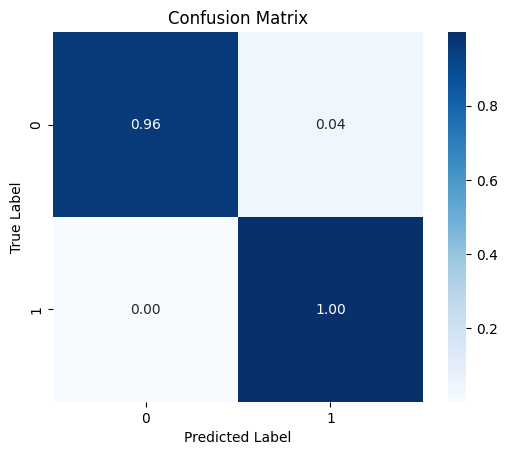

In [ ]:
svc.plot_confusion_matrix()

View ROC Curve

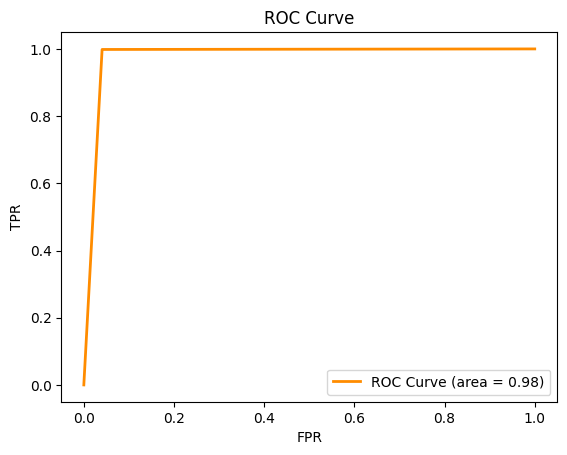

In [ ]:
svc.plot_Roc()

Learning Curve

Fitting 3 folds for each of 9 candidates, totalling 27 fits
Fitting 3 folds for each of 9 candidates, totalling 27 fits
Fitting 3 folds for each of 9 candidates, totalling 27 fits
Fitting 3 folds for each of 9 candidates, totalling 27 fits
Fitting 3 folds for each of 9 candidates, totalling 27 fits
Fitting 3 folds for each of 9 candidates, totalling 27 fits
Fitting 3 folds for each of 9 candidates, totalling 27 fits
Fitting 3 folds for each of 9 candidates, totalling 27 fits
Fitting 3 folds for each of 9 candidates, totalling 27 fits
Fitting 3 folds for each of 9 candidates, totalling 27 fits
Fitting 3 folds for each of 9 candidates, totalling 27 fits
Fitting 3 folds for each of 9 candidates, totalling 27 fits
Fitting 3 folds for each of 9 candidates, totalling 27 fits
Fitting 3 folds for each of 9 candidates, totalling 27 fits
Fitting 3 folds for each of 9 candidates, totalling 27 fits
Fitting 3 folds for each of 9 candidates, totalling 27 fits
Fitting 3 folds for each of 9 candidates

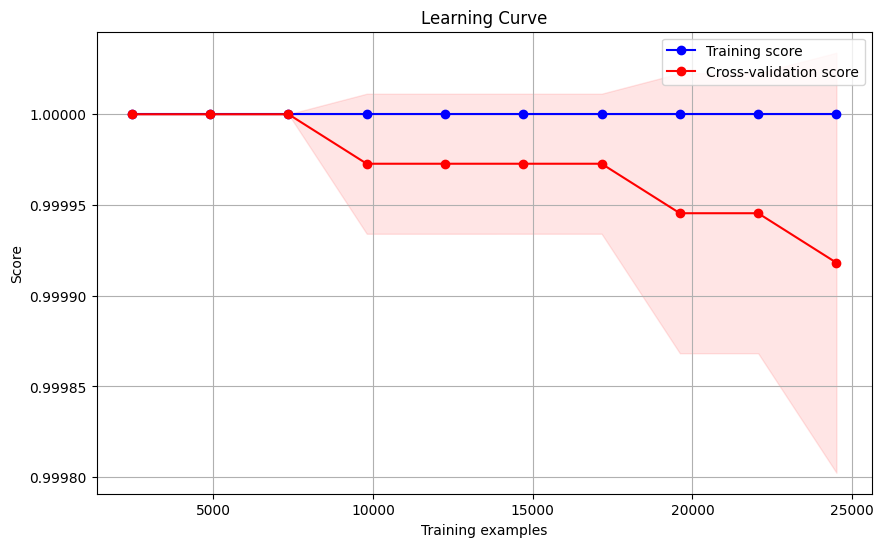

In [ ]:
svc.plot_learning_curve()

Predict

In [ ]:
text_0 = 'Japanese composer Asei Kobayashi, known for a number of hit tunes for TV commercials, has died, it has been learned. He was 88. A graduate of Keio University, Kobayashi studied under composer Tadashi Hattori after working as a corporate employee. A 1961 jingle for apparel maker Renown Inc., "Wansaka Musume," catapulted him to stardom, and he had since churned out a host of very popular TV ad tunes, including for Hitachi Ltd. ("Konoki nannoki"), Suntory ("Yoru ga kuru"), Meiji Co. ("Meiji Chelsea no uta") and Bridgestone Corp. ("Dokomademo iko"). He also composed the 1975 million-seller song "Kita no yado kara" for enka singer Harumi Miyako. Besides his musical career, Kobayashi, a Tokyo native, also starred in the TV drama serial "Terauchi Kantaro ikka," which earned him popularity as an actor. (Mainichi)'

In [ ]:
print(svc.predict_class(text_0))

[0]


In [ ]:
text_1 = 'This could be due to a conflict with your ad-blocking or security software. Please addjapantimes.co.jpandpiano.ioto your list of allowed sites. If this does not resolve the issue or you are unable to add the domains to your allowlist, please see outthis support page. We humbly apologize for the inconvenience.'
print(svc.predict_class(text_1))

[1]


As was to be expected, the model overfitted because a highly unbalanced dataset was used, and the chosen SVC model is not suitable for unbalanced classes.
Let us try using other previously defined datasets.

**Load Dataset Oversampling**

In [ ]:
import pandas as pd
data_over = pd.read_csv('/content/drive/MyDrive/Analisi/SavedEmbeddingModels/embedding_over_english_news.csv', encoding='utf-8', delimiter='\t')

In [ ]:
data_over

,source_encoded,combined_text,embedding
0,0,"6 12 2021 0 Null Editorial: Japan govt's 20,00...",[ 3.25423554e-02 2.79700030e-02 3.50835212e-...
1,0,7 12 2021 0 Null Editorial: Time for Japan PM ...,[ 2.49778125e-02 4.50554378e-02 3.42946798e-...
2,0,8 12 2021 0 Null Editorial: 80 years on from P...,[ 3.70996930e-02 6.89596012e-02 4.45956700e-...
3,0,"8 12 2021 0 Null Yoroku: 80 years later, many ...",[ 3.63590345e-02 5.22514731e-02 5.68051897e-...
4,0,8 12 2021 0 Null Promoting respect for human r...,[ 0.00740054 0.04346036 0.05484787 0.093266...
...,...,...,...
55131,0,27 9 2021 0 Null Rolling Stones open American ...,[ 5.14115952e-02 5.02928570e-02 2.78580617e-...
55132,0,"8 12 2021 0 Null Yoroku: 80 years later, many ...",[ 3.63590345e-02 5.22514731e-02 5.68051897e-...
55133,0,"29 4 2021 0 Null Astronaut Michael Collins, Ap...",[ 0.02854477 0.05696912 0.04292002 0.080046...
55134,0,30 12 2021 0 Null News Navigator: What is the ...,[ 2.56000347e-02 3.36872004e-02 5.17813340e-...


In [ ]:
data_over['source_encoded'].value_counts()

1    36692
0    18444
Name: source_encoded, dtype: int64

In [ ]:
import numpy as np
data_over['embedding_numeric'] = data_over['embedding'].apply(embedding_to_numeric)
X_over = np.vstack(data_over['embedding_numeric'].values)
y_over = data_over['source_encoded']

In [ ]:
svc_over = Classifier(X_over, y_over, class_weight = {0: 2, 1: 1})

In [ ]:
svc_over.train()

Fitting 2 folds for each of 9 candidates, totalling 18 fits
Best hyperparameters found: {'C': 0.1, 'class_weight': {0: 2, 1: 1}, 'gamma': 0.1, 'kernel': 'linear'}


In [ ]:
accuracy, precision, recall, f1, confusion_mat = svc_over.evaluating()

Fitting 2 folds for each of 9 candidates, totalling 18 fits
Fitting 2 folds for each of 9 candidates, totalling 18 fits
Fitting 2 folds for each of 9 candidates, totalling 18 fits
Fitting 2 folds for each of 9 candidates, totalling 18 fits
Fitting 2 folds for each of 9 candidates, totalling 18 fits
Fitting 2 folds for each of 9 candidates, totalling 18 fits
Fitting 2 folds for each of 9 candidates, totalling 18 fits
Fitting 2 folds for each of 9 candidates, totalling 18 fits
Fitting 2 folds for each of 9 candidates, totalling 18 fits
Fitting 2 folds for each of 9 candidates, totalling 18 fits


In [ ]:
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1: {f1}")
print(f"Confusion Matrix:\n {confusion_mat}")

Accuracy: 0.9983858096343587
Precision: 1.0
Recall: 0.997574403139649
F1: 0.9987857197715662
Confusion Matrix:
 [[18444     0]
 [   89 36603]]


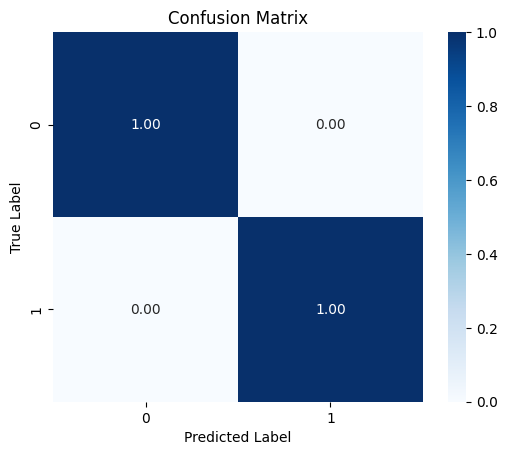

In [ ]:
svc_over.plot_confusion_matrix()

In [ ]:
text = 'Japanese composer Asei Kobayashi, known for a number of hit tunes for TV commercials, has died, it has been learned. He was 88. A graduate of Keio University, Kobayashi studied under composer Tadashi Hattori after working as a corporate employee. A 1961 jingle for apparel maker Renown Inc., "Wansaka Musume," catapulted him to stardom, and he had since churned out a host of very popular TV ad tunes, including for Hitachi Ltd. ("Konoki nannoki"), Suntory ("Yoru ga kuru"), Meiji Co. ("Meiji Chelsea no uta") and Bridgestone Corp. ("Dokomademo iko"). He also composed the 1975 million-seller song "Kita no yado kara" for enka singer Harumi Miyako. Besides his musical career, Kobayashi, a Tokyo native, also starred in the TV drama serial "Terauchi Kantaro ikka," which earned him popularity as an actor. (Mainichi)'
print(svc_over.predict_class(text))

[0]


**SUB-OVER**

In [ ]:
import pandas as pd
data_sub_over = pd.read_csv('/content/drive/MyDrive/Analisi/SavedEmbeddingModels/embedding_sub_over_english_news.csv', encoding='utf-8', delimiter='\t')

In [ ]:
import numpy as np
data_sub_over['embedding_numeric'] = data_sub_over['embedding'].apply(embedding_to_numeric)
X_sub_over = np.vstack(data_sub_over['embedding_numeric'].values)
y_sub_over = data_sub_over['source_encoded']

In [ ]:
svc_sub_over = Classifier(X_over, y_over, class_weight = 'balanced')

In [ ]:
svc_sub_over.train()

Fitting 2 folds for each of 9 candidates, totalling 18 fits
Best hyperparameters found: {'C': 0.1, 'class_weight': 'balanced', 'gamma': 0.1, 'kernel': 'linear'}


In [ ]:
accuracy, precision, recall, f1, confusion_mat = svc_sub_over.evaluating()

Fitting 2 folds for each of 9 candidates, totalling 18 fits
Fitting 2 folds for each of 9 candidates, totalling 18 fits
Fitting 2 folds for each of 9 candidates, totalling 18 fits
Fitting 2 folds for each of 9 candidates, totalling 18 fits
Fitting 2 folds for each of 9 candidates, totalling 18 fits
Fitting 2 folds for each of 9 candidates, totalling 18 fits
Fitting 2 folds for each of 9 candidates, totalling 18 fits
Fitting 2 folds for each of 9 candidates, totalling 18 fits
Fitting 2 folds for each of 9 candidates, totalling 18 fits
Fitting 2 folds for each of 9 candidates, totalling 18 fits


In [ ]:
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1: {f1}")
print(f"Confusion Matrix:\n {confusion_mat}")

Accuracy: 0.9981137550783516
Precision: 1.0
Recall: 0.9971655946800393
F1: 0.9985807830424334
Confusion Matrix:
 [[18444     0]
 [  104 36588]]


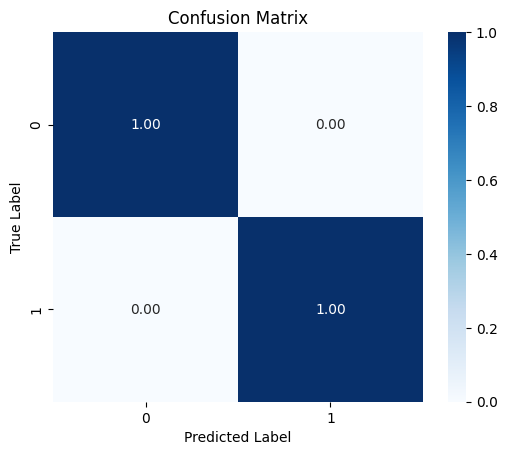

In [ ]:
svc_sub_over.plot_confusion_matrix()

In [ ]:
text = 'Null Japanese composer Asei Kobayashi, known for a number of hit tunes for TV commercials, has died, it has been learned. He was 88. A graduate of Keio University, Kobayashi studied under composer Tadashi Hattori after working as a corporate employee. A 1961 jingle for apparel maker Renown Inc., "Wansaka Musume," catapulted him to stardom, and he had since churned out a host of very popular TV ad tunes, including for Hitachi Ltd. ("Konoki nannoki"), Suntory ("Yoru ga kuru"), Meiji Co. ("Meiji Chelsea no uta") and Bridgestone Corp. ("Dokomademo iko"). He also composed the 1975 million-seller song "Kita no yado kara" for enka singer Harumi Miyako. Besides his musical career, Kobayashi, a Tokyo native, also starred in the TV drama serial "Terauchi Kantaro ikka," which earned him popularity as an actor. (Mainichi)'
print(svc_sub_over.predict_class(text))

[0]


In [ ]:
text_1 = '2 4 2002 0 Hiroshi Matsubara Nonsmokers little...'
print(svc_sub_over.predict_class(text_1))

[1]


In [ ]:
filtered_df = data_sub_over[data_sub_over['source_encoded'] == 1]

In [ ]:
filtered_df

,source_encoded,combined_text,embedding,embedding_numeric
18444,1,2 4 2002 0 Hiroshi Matsubara Nonsmokers little...,[ 2.47382000e-02 4.49672081e-02 3.16717103e-...,"[0.0247382, 0.0449672081, 0.0316717103, 0.1026..."
18445,1,17 6 2002 0 Null Foreigners sit new admission ...,[ 1.52862109e-02 3.40122841e-02 5.97552992e-...,"[0.0152862109, 0.0340122841, 0.0597552992, 0.0..."
18446,1,30 5 2003 0 Null Resona Holdings suffers 549.4...,[ 3.62158194e-02 2.34624390e-02 6.02639019e-...,"[0.0362158194, 0.023462439, 0.0602639019, 0.06..."
18447,1,16 6 2002 1 Null Rhodes smacks three home runs...,[ 0.04579127 0.07327162 0.06286388 0.065371...,"[0.04579127, 0.07327162, 0.06286388, 0.0653711..."
18448,1,1 10 2003 0 Null 450 sue over 'power-saving' s...,[ 0.04689104 0.02533155 0.03406353 0.066050...,"[0.04689104, 0.02533155, 0.03406353, 0.0660503..."
...,...,...,...,...
31314,1,7 2 2002 0 Null 75% foresee Snow Brand doom: p...,[ 0.05488285 0.0281225 0.03213878 0.078901...,"[0.05488285, 0.0281225, 0.03213878, 0.0789015,..."
31315,1,15 1 2019 0 Null Germany sees weakest growth i...,[ 2.44456418e-02 3.62930968e-02 4.13905270e-...,"[0.0244456418, 0.0362930968, 0.041390527, 0.10..."
31316,1,7 6 2001 0 Null Banks need strong medicine to ...,[ 2.37438250e-02 5.56069650e-02 3.35687622e-...,"[0.023743825, 0.055606965, 0.0335687622, 0.091..."
31317,1,10 1 2010 1 Dmitri Trenin Kremlin two-step: mo...,[ 0.04563623 0.04367767 0.05696307 0.139547...,"[0.04563623, 0.04367767, 0.05696307, 0.1395470..."


# **RANDOM FOREST**

**Random forests, as well as XGBoost, are unaffected by unbalanced datasets and, compared with SVCs, can also handle categorical data, making them perfect for classification based not only on column embedding**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle
import pickle
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, roc_curve, auc
import seaborn as sns
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn import metrics
from gensim.models import KeyedVectors
import numpy as np
from sklearn.model_selection import learning_curve

class ClassifierForest:
    def __init__(self, X, y, n_splits=2, class_weight=None):
        self.X = X
        self.y = y
        self.class_weight = class_weight
        self.n_splits = n_splits
        self.model = None
        self.kfold = None
        self.y_pred = None


    def train(self):

        # Hyperparameters
        parameters = {'max_depth': [10, 15, 20, 25],
                      #'criterion': ['gini', 'entropy', 'log_loss'],
                      'n_estimators': [100, 200, 300],
                      #'max_features': ['auto', 'sqrt', 'log2'],
                      'class_weight': [self.class_weight]
                      }
        # Hyperparameters
        parameters2 = {'max_depth': [10, 15],
                      'n_estimators': [100],
                      'class_weight': [self.class_weight]
                      }

        # SVC model
        forest = RandomForestClassifier()

        # Grid Search
        # Only 2 folds because I have little data from one class so I prefer to divide into 2 semesters
        stratified_kfold = StratifiedKFold(n_splits=self.n_splits, shuffle=True, random_state=42)
        self.kfold = stratified_kfold
        grid_search = GridSearchCV(forest, parameters2, cv=stratified_kfold, scoring='precision', verbose=1)

        # Fitting with k-fold
        grid_search.fit(self.X, self.y)

        # Save
        self.model = grid_search

        print(f"Best hyperparameters found: {self.model.best_params_}")

    def evaluating(self):

        # Metrics
        accuracy = cross_val_score(self.model, self.X, self.y, cv=self.kfold, scoring='accuracy').mean()
        precision = cross_val_score(self.model, self.X, self.y, cv=self.kfold, scoring='precision').mean()
        recall = cross_val_score(self.model, self.X, self.y, cv=self.kfold, scoring='recall').mean()
        f1 = cross_val_score(self.model, self.X, self.y, cv=self.kfold, scoring='f1').mean()
        score = cross_val_score(self.model, self.X, self.y, cv=self.kfold)
        # Predictions for each fold
        y_pred = cross_val_predict(self.model, self.X, self.y, cv=self.kfold)

        # Confusion Matrix
        confusion_mat = confusion_matrix(self.y, y_pred)

        self.y_pred = y_pred

        return accuracy, precision, recall, f1, confusion_mat, score

    def short_evaluating(self):

        # Metrics
        precision = cross_val_score(self.model, self.X, self.y, cv=self.kfold, scoring='precision').mean()
        f1 = cross_val_score(self.model, self.X, self.y, cv=self.kfold, scoring='f1').mean()
        # Predictions for each fold
        y_pred = cross_val_predict(self.model, self.X, self.y, cv=self.kfold)

        self.y_pred = y_pred

        return precision, f1, y_pred

    def plot_Roc(self):

      # Evaluate ROC curve
      fpr, tpr, _ = roc_curve(self.y, self.y_pred)
      roc_auc = auc(fpr, tpr)

      # Plot ROC curve
      plt.figure()
      plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC Curve (area = %0.2f)' % roc_auc)
      plt.xlabel('FPR')
      plt.ylabel('TPR')
      plt.title('ROC Curve')
      plt.legend(loc="lower right")
      plt.show()


    def plot_confusion_matrix(self):
        # Calculate the normalized confusion matrix
        confusion_mat = confusion_matrix(self.y, self.y_pred, normalize='true')

        sns.heatmap(confusion_mat, annot=True, cmap='Blues', fmt='.2f', square=True)
        plt.xlabel('Predicted Label')
        plt.ylabel('True Label')
        plt.title('Confusion Matrix')
        plt.show()


    def embedding_prediction(self, text, aggregation_func=np.mean):
        # Function to get text embeddings using the pre-trained model.
        def get_embedding(text):
          # Split text
          words = text.lower().split()
          # Generate embedding
          embedding = [pre_trained_model[word] for word in words if word in pre_trained_model]
          # Average Embedding
          return aggregation_func(embedding, axis=0) if embedding else np.zeros(300)

        # Load pre-trained model
        pre_trained_model = KeyedVectors.load(f'/content/drive/MyDrive/Analisi/word2vec-google-news-300')


        # Generate the embedding for the text
        embedding = get_embedding(text)

        return embedding

    def predict_class(self, text):


      embedding = self.embedding_prediction(text)
      # Reshape the embedding to match the model's input shape if necessary
      embedding = embedding.reshape(1, -1)

      # Perform the prediction
      prediction = self.model.predict(embedding)

      return prediction

    def save_model(self, filepath):
        # Save model
        pickle.dump(self.model, open(filepath, 'wb'))

    def plot_learning_curve(self, train_sizes=np.linspace(0.1, 1.0, 10)):
        train_sizes, train_scores, test_scores = learning_curve(self.model, self.X, self.y, cv=self.kfold, train_sizes=train_sizes)

        train_scores_mean = np.mean(train_scores, axis=1)
        train_scores_std = np.std(train_scores, axis=1)
        test_scores_mean = np.mean(test_scores, axis=1)
        test_scores_std = np.std(test_scores, axis=1)

        plt.figure(figsize=(10, 6))
        plt.grid()
        plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="b")
        plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="r")
        plt.plot(train_sizes, train_scores_mean, 'o-', color="b", label="Training score")
        plt.plot(train_sizes, test_scores_mean, 'o-', color="r", label="Cross-validation score")
        plt.xlabel("Training examples")
        plt.ylabel("Score")
        plt.legend(loc="best")
        plt.title("Learning Curve")
        plt.show()

**Data Oversampling**

In [ ]:
import pandas as pd
data_over_forest = pd.read_csv('/content/drive/MyDrive/Analisi/SavedEmbeddingModels/embedding_over_english_news.csv', encoding='utf-8', delimiter='\t')

In [ ]:
import numpy as np
data_over_forest['embedding_numeric'] = data_over_forest['embedding'].apply(embedding_to_numeric)
X_over_forest = np.vstack(data_over_forest['embedding_numeric'].values)
y_over_forest = data_over_forest['source_encoded']

In [ ]:
clf = ClassifierForest(X_over_forest, y_over_forest, class_weight = {0: 2, 1: 1})

In [ ]:
clf.train()

Fitting 2 folds for each of 12 candidates, totalling 24 fits
Best hyperparameters found: {'class_weight': {0: 2, 1: 1}, 'max_depth': 10, 'n_estimators': 100}


In [ ]:
accuracy, precision, recall, f1, confusion_mat, score = clf.evaluating()

Fitting 2 folds for each of 12 candidates, totalling 24 fits
Fitting 2 folds for each of 12 candidates, totalling 24 fits
Fitting 2 folds for each of 12 candidates, totalling 24 fits
Fitting 2 folds for each of 12 candidates, totalling 24 fits
Fitting 2 folds for each of 12 candidates, totalling 24 fits
Fitting 2 folds for each of 12 candidates, totalling 24 fits
Fitting 2 folds for each of 12 candidates, totalling 24 fits
Fitting 2 folds for each of 12 candidates, totalling 24 fits
Fitting 2 folds for each of 12 candidates, totalling 24 fits
Fitting 2 folds for each of 12 candidates, totalling 24 fits
Fitting 2 folds for each of 12 candidates, totalling 24 fits
Fitting 2 folds for each of 12 candidates, totalling 24 fits


In [ ]:
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1: {f1}")
print(f"Score:\n {score}")
print(f"Confusion Matrix:\n {confusion_mat}")

Accuracy: 0.9994740278583865
Precision: 1.0
Recall: 0.9991006213888587
F1: 0.9995910236039972
Score:
 [1. 1.]
Confusion Matrix:
 [[18444     0]
 [   33 36659]]


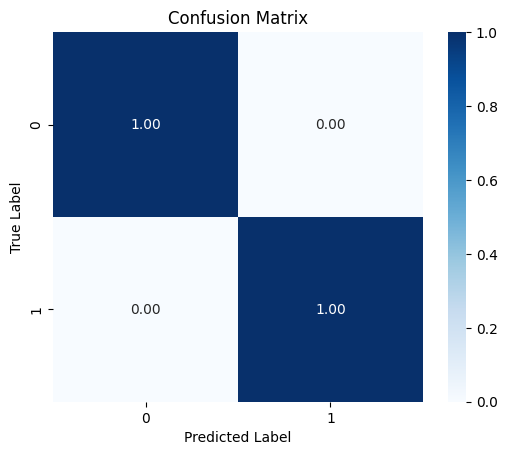

In [ ]:
clf.plot_confusion_matrix()

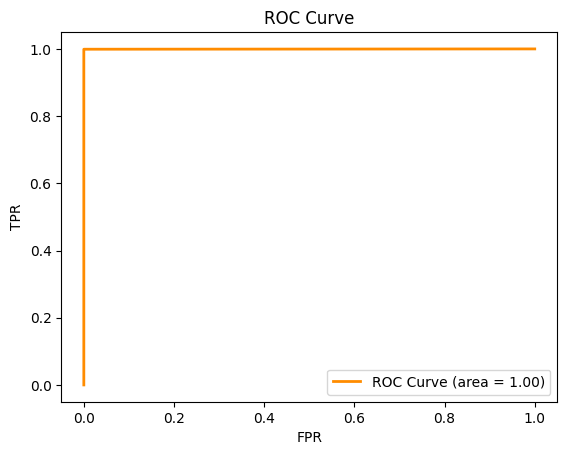

In [ ]:
clf.plot_Roc()

**Data oversampling with multiple column**

In [ ]:
import pandas as pd
data_over_no_merge = pd.read_csv('/content/drive/MyDrive/Analisi/SavedEmbeddingModels/no_merge_embedding_english_news.csv', encoding='utf-8', delimiter='\t')

In [ ]:
data_over_no_merge

,Day,Month,Year,Weekend,author,source_encoded,embedding_title,embedding_text
0,6,12,2021,0,Null,0,[ 0.10377333 0.02583143 -0.00912009 0.150071...,[ 0.03095463 0.0292294 0.03529097 0.076628...
1,7,12,2021,0,Null,0,[-5.77087402e-02 6.79524755e-03 -1.16984046e-...,[ 2.60039773e-02 4.73110229e-02 3.41150202e-...
2,8,12,2021,0,Null,0,[ 0.10662842 0.11295862 -0.00758972 0.028295...,[ 3.51128802e-02 6.96183145e-02 4.51950170e-...
3,8,12,2021,0,Null,0,[ 0.06624756 0.08993006 0.02525635 0.007104...,[ 0.03528699 0.05304125 0.05697503 0.066625...
4,8,12,2021,0,Null,0,[-1.28716361e-02 6.58026785e-02 1.06236778e-...,[ 0.00748573 0.04434368 0.05328304 0.094203...
...,...,...,...,...,...,...,...,...
36761,6,6,2021,1,Null,1,[-0.0460641 0.06056431 -0.02904402 0.033403...,[ 0.04822294 0.04165182 0.05532258 0.099265...
36762,7,6,2021,0,Null,1,[-6.15234375e-02 -8.90624970e-02 -5.69702163e-...,[ 3.40728760e-02 2.29865424e-02 5.69032654e-...
36763,7,6,2021,0,Null,1,[-0.01393433 0.03564453 -0.09428711 0.166699...,[ 0.02249205 0.04358714 0.04166095 0.106017...
36764,7,6,2021,0,Null,1,[-0.00062561 0.07688395 0.0304362 0.079996...,[ 3.22570801e-02 5.32072224e-02 3.76736000e-...


In [ ]:
data_over_no_merge['embedding_numeric_title'] = data_over_no_merge['embedding_title'].apply(embedding_to_numeric)
data_over_no_merge['embedding_numeric_text'] = data_over_no_merge['embedding_text'].apply(embedding_to_numeric)

In [ ]:
data_over_no_merge = data_over_no_merge.drop("embedding_text", axis=1)
data_over_no_merge = data_over_no_merge.drop("embedding_title", axis=1)
data_over_no_merge

,Day,Month,Year,Weekend,author,source_encoded,embedding_numeric_title,embedding_numeric_text
0,6,12,2021,0,Null,0,"[0.10377333, 0.02583143, -0.00912009, 0.150071...","[0.03095463, 0.0292294, 0.03529097, 0.07662826..."
1,7,12,2021,0,Null,0,"[-0.0577087402, 0.00679524755, -0.00116984046,...","[0.0260039773, 0.0473110229, 0.0341150202, 0.0..."
2,8,12,2021,0,Null,0,"[0.10662842, 0.11295862, -0.00758972, 0.028295...","[0.0351128802, 0.0696183145, 0.045195017, 0.08..."
3,8,12,2021,0,Null,0,"[0.06624756, 0.08993006, 0.02525635, 0.0071044...","[0.03528699, 0.05304125, 0.05697503, 0.0666258..."
4,8,12,2021,0,Null,0,"[-0.0128716361, 0.0658026785, 0.106236778, 0.0...","[0.00748573, 0.04434368, 0.05328304, 0.0942031..."
...,...,...,...,...,...,...,...,...
36761,6,6,2021,1,Null,1,"[-0.0460641, 0.06056431, -0.02904402, 0.033403...","[0.04822294, 0.04165182, 0.05532258, 0.0992653..."
36762,7,6,2021,0,Null,1,"[-0.0615234375, -0.089062497, -0.0569702163, 0...","[0.034072876, 0.0229865424, 0.0569032654, 0.09..."
36763,7,6,2021,0,Null,1,"[-0.01393433, 0.03564453, -0.09428711, 0.16669...","[0.02249205, 0.04358714, 0.04166095, 0.1060170..."
36764,7,6,2021,0,Null,1,"[-0.00062561, 0.07688395, 0.0304362, 0.0799967...","[0.0322570801, 0.0532072224, 0.0376736, 0.0824..."


In [ ]:
import numpy as np
data_over_no_merge.replace("Null", np.nan, inplace=True)

In [ ]:
data_over_no_merge["missing_author"] = data_over_no_merge["author"].isnull().astype(int)
data_over_no_merge = data_over_no_merge.drop("author", axis=1)

In [ ]:
data_over_no_merge

,Day,Month,Year,Weekend,source_encoded,embedding_numeric_title,embedding_numeric_text,missing_author
0,6,12,2021,0,0,"[0.10377333, 0.02583143, -0.00912009, 0.150071...","[0.03095463, 0.0292294, 0.03529097, 0.07662826...",1
1,7,12,2021,0,0,"[-0.0577087402, 0.00679524755, -0.00116984046,...","[0.0260039773, 0.0473110229, 0.0341150202, 0.0...",1
2,8,12,2021,0,0,"[0.10662842, 0.11295862, -0.00758972, 0.028295...","[0.0351128802, 0.0696183145, 0.045195017, 0.08...",1
3,8,12,2021,0,0,"[0.06624756, 0.08993006, 0.02525635, 0.0071044...","[0.03528699, 0.05304125, 0.05697503, 0.0666258...",1
4,8,12,2021,0,0,"[-0.0128716361, 0.0658026785, 0.106236778, 0.0...","[0.00748573, 0.04434368, 0.05328304, 0.0942031...",1
...,...,...,...,...,...,...,...,...
36761,6,6,2021,1,1,"[-0.0460641, 0.06056431, -0.02904402, 0.033403...","[0.04822294, 0.04165182, 0.05532258, 0.0992653...",1
36762,7,6,2021,0,1,"[-0.0615234375, -0.089062497, -0.0569702163, 0...","[0.034072876, 0.0229865424, 0.0569032654, 0.09...",1
36763,7,6,2021,0,1,"[-0.01393433, 0.03564453, -0.09428711, 0.16669...","[0.02249205, 0.04358714, 0.04166095, 0.1060170...",1
36764,7,6,2021,0,1,"[-0.00062561, 0.07688395, 0.0304362, 0.0799967...","[0.0322570801, 0.0532072224, 0.0376736, 0.0824...",1


In [ ]:
embedding = data_over_no_merge.loc[0, "embedding_numeric_text"]

for i, val in enumerate(embedding):
    col_name = f"feature_{i}"
    data_over_no_merge[col_name] = data_over_no_merge["embedding_numeric_title"].apply(lambda x: x[i])

In [ ]:
data_over_no_merge2 = data_over_no_merge

In [ ]:
data_over_no_merge2 = data_over_no_merge2.drop("embedding_numeric_title", axis=1)
data_over_no_merge2 = data_over_no_merge2.drop("embedding_numeric_text", axis=1)

In [ ]:
data_over_no_merge2

,Day,Month,Year,Weekend,source_encoded,missing_author,feature_0,feature_1,feature_2,feature_3,...,feature_290,feature_291,feature_292,feature_293,feature_294,feature_295,feature_296,feature_297,feature_298,feature_299
0,6,12,2021,0,0,1,0.103773,0.025831,-0.009120,0.150072,...,-0.022759,-0.043637,-0.010030,0.044081,-0.050050,0.011251,-0.126587,-0.008423,-0.005900,-0.015917
1,7,12,2021,0,0,1,-0.057709,0.006795,-0.001170,0.107366,...,-0.053731,0.006673,-0.054860,0.034729,0.010895,-0.146161,-0.118306,-0.012718,0.046753,0.046224
2,8,12,2021,0,0,1,0.106628,0.112959,-0.007590,0.028296,...,-0.110559,-0.043726,-0.024540,0.007800,-0.009094,0.009830,-0.040637,0.037692,0.080151,0.013953
3,8,12,2021,0,0,1,0.066248,0.089930,0.025256,0.007104,...,-0.109229,-0.052167,0.002358,-0.066333,-0.007565,-0.087598,0.021460,-0.055017,0.077979,0.011365
4,8,12,2021,0,0,1,-0.012872,0.065803,0.106237,0.098741,...,0.004856,0.015062,-0.099569,-0.052192,-0.062012,-0.041695,-0.030979,-0.015115,-0.015218,0.036051
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36761,6,6,2021,1,1,1,-0.046064,0.060564,-0.029044,0.033404,...,0.082694,-0.060869,-0.001186,0.115230,-0.018834,0.067174,-0.029078,-0.003610,0.142997,0.075152
36762,7,6,2021,0,1,1,-0.061523,-0.089062,-0.056970,0.170410,...,-0.023340,0.053125,-0.043994,0.063086,-0.048047,0.057520,-0.082178,0.035132,0.008069,0.062256
36763,7,6,2021,0,1,1,-0.013934,0.035645,-0.094287,0.166699,...,-0.079004,0.018579,-0.072595,0.023633,-0.013497,-0.007129,-0.030493,-0.006976,0.010498,-0.061426
36764,7,6,2021,0,1,1,-0.000626,0.076884,0.030436,0.079997,...,0.047567,-0.123901,-0.002848,0.115885,-0.016069,0.034098,0.130859,-0.130046,0.140055,0.003530


In [ ]:
X = data_over_no_merge2.drop("source_encoded", axis=1)
y = data_over_no_merge2[['source_encoded']]

In [ ]:
X

,Day,Month,Year,Weekend,missing_author,feature_0,feature_1,feature_2,feature_3,feature_4,...,feature_290,feature_291,feature_292,feature_293,feature_294,feature_295,feature_296,feature_297,feature_298,feature_299
0,6,12,2021,0,1,0.103773,0.025831,-0.009120,0.150072,-0.152985,...,-0.022759,-0.043637,-0.010030,0.044081,-0.050050,0.011251,-0.126587,-0.008423,-0.005900,-0.015917
1,7,12,2021,0,1,-0.057709,0.006795,-0.001170,0.107366,-0.064565,...,-0.053731,0.006673,-0.054860,0.034729,0.010895,-0.146161,-0.118306,-0.012718,0.046753,0.046224
2,8,12,2021,0,1,0.106628,0.112959,-0.007590,0.028296,-0.066736,...,-0.110559,-0.043726,-0.024540,0.007800,-0.009094,0.009830,-0.040637,0.037692,0.080151,0.013953
3,8,12,2021,0,1,0.066248,0.089930,0.025256,0.007104,-0.023468,...,-0.109229,-0.052167,0.002358,-0.066333,-0.007565,-0.087598,0.021460,-0.055017,0.077979,0.011365
4,8,12,2021,0,1,-0.012872,0.065803,0.106237,0.098741,-0.076945,...,0.004856,0.015062,-0.099569,-0.052192,-0.062012,-0.041695,-0.030979,-0.015115,-0.015218,0.036051
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36761,6,6,2021,1,1,-0.046064,0.060564,-0.029044,0.033404,-0.063232,...,0.082694,-0.060869,-0.001186,0.115230,-0.018834,0.067174,-0.029078,-0.003610,0.142997,0.075152
36762,7,6,2021,0,1,-0.061523,-0.089062,-0.056970,0.170410,-0.094287,...,-0.023340,0.053125,-0.043994,0.063086,-0.048047,0.057520,-0.082178,0.035132,0.008069,0.062256
36763,7,6,2021,0,1,-0.013934,0.035645,-0.094287,0.166699,-0.032080,...,-0.079004,0.018579,-0.072595,0.023633,-0.013497,-0.007129,-0.030493,-0.006976,0.010498,-0.061426
36764,7,6,2021,0,1,-0.000626,0.076884,0.030436,0.079997,0.019358,...,0.047567,-0.123901,-0.002848,0.115885,-0.016069,0.034098,0.130859,-0.130046,0.140055,0.003530


In [ ]:
y

,source_encoded
0,0
1,0
2,0
3,0
4,0
...,...
36761,1
36762,1
36763,1
36764,1


In [ ]:
y.value_counts()

source_encoded
1                 36692
0                    74
dtype: int64

In [ ]:
X['missing_author'].value_counts()

1    24042
0    12724
Name: missing_author, dtype: int64

In [ ]:
svc2 = Classifier(X, y)

In [ ]:
svc2.train()

In [ ]:
accuracy, precision, recall, f1, confusion_mat, score = svc2.evaluating()

In [ ]:
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1: {f1}")
print(f"Score:\n {score}")
print(f"Confusion Matrix:\n {confusion_mat}")

Accuracy: 0.9998368057444378
Precision: 0.999918238308078
Recall: 0.999918238308078
F1: 0.999918238308078
Score:
 [0.99994549 0.99989098]
Confusion Matrix:
 [[   71     3]
 [    3 36689]]


In [ ]:
clf2 = ClassifierForest(X, y, class_weight = {0: 2, 1: 1})

In [ ]:
clf2.train()

In [ ]:
precision, f1, score = clf2.short_evaluating()

In [ ]:
print(f"Precision: {precision}")
print(f"F1: {f1}")
print(f"Score:\n {score}")

Precision: 1.0
F1: 0.9999727453598976
Score:
 [0 0 0 ... 0 0 0]


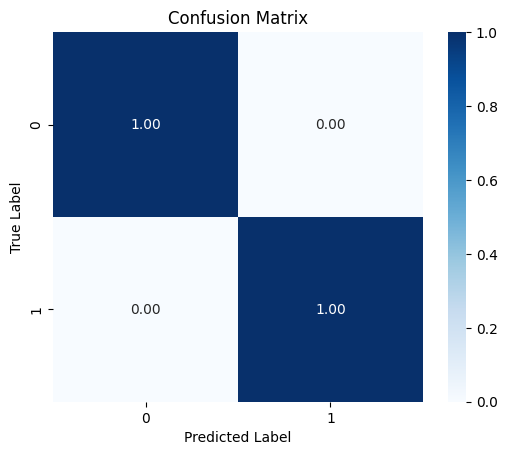

In [ ]:
clf2.plot_confusion_matrix()

**It is useless to try additional models because you always overfitting, surely the problem can be blamed on the embedding, probably the pre-trained model is not suitable or you have to use other techniques**

**Let's try using neural networks, maybe they can overcome the problem**

# **Neural Network**

I try to construct a CNN having as input an embedding layer

In [ ]:
!pip install tensorflow
!pip install keras

In [11]:
import numpy as np
from sklearn.model_selection import train_test_split
import pandas as pd


preprocessor = PreProcessing('ModellingDataset/over_english_news.csv')
preprocessed_df = preprocessor.apply_preprocessing()

# Load dataset
data = preprocessed_df.data_frame

In [ ]:
data

,title,Day,Month,Year,Weekend,author,text,source_encoded
0,"Editorial: Japan govt's 20,000-yen handout mis...",6,12,2021,0,NaN,The Japanese government is trying to boost the...,0
1,Editorial: Time for Japan PM Kishida to delive...,7,12,2021,0,NaN,"Prime Minister Fumio Kishida, who won a public...",0
2,"Editorial: 80 years on from Pearl Harbor, acti...",8,12,2021,0,NaN,It has been 80 years since the start of the Pa...,0
3,"Yoroku: 80 years later, many lessons still not...",8,12,2021,0,NaN,"""The world has changed completely. The era was...",0
4,Promoting respect for human rights behind US '...,8,12,2021,0,NaN,The U.S. administration under President Joe Bi...,0
...,...,...,...,...,...,...,...,...
55254,"Rolling Stones open American tour, pay tribute...",27,9,2021,0,NaN,ST. LOUIS (AP) -- The Rolling Stones are touri...,0
55255,"Yoroku: 80 years later, many lessons still not...",8,12,2021,0,NaN,"""The world has changed completely. The era was...",0
55256,"Astronaut Michael Collins, Apollo 11 pilot, de...",29,4,2021,0,NaN,"(AP) -- Apollo 11 astronaut Michael Collins, w...",0
55257,News Navigator: What is the Quadrantid meteor ...,30,12,2021,0,NaN,The Mainichi Shimbun answers some common quest...,0


**Pre-processing Text**

In [95]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout, TextVectorization, InputLayer, Embedding, Conv1D, MaxPooling1D, GlobalMaxPooling1D
import tensorflow as tf
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from nltk.corpus import stopwords
import numpy as np
import matplotlib.pyplot as plt
from keras import regularizers
from keras.metrics import Precision, Recall, AUC, BinaryAccuracy

In [9]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [12]:
data['text_title'] = data['title'] + ' ' + data['text']

In [13]:
# Pre-processing text

# Convert to lowercase
data['text_title'] = data['text_title'].apply(lambda x: x.lower())

# Remove punctuation
data['text_title'] = data['text_title'].str.replace('[^\w\s]','')

# Remove stop words
stop_words = set(stopwords.words('english'))
data['text_title'] = data['text_title'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))



<ipython-input-13-ca4228e71da4>:7: FutureWarning: The default value of regex will change from True to False in a future version.
  data['text_title'] = data['text_title'].str.replace('[^\w\s]','')


In [ ]:
data

,title,Day,Month,Year,Weekend,author,text,source_encoded,text_title
0,"Editorial: Japan govt's 20,000-yen handout mis...",6,12,2021,0,NaN,The Japanese government is trying to boost the...,0,editorial japan govts 20000yen handout misses ...
1,Editorial: Time for Japan PM Kishida to delive...,7,12,2021,0,NaN,"Prime Minister Fumio Kishida, who won a public...",0,editorial time japan pm kishida deliver respec...
2,"Editorial: 80 years on from Pearl Harbor, acti...",8,12,2021,0,NaN,It has been 80 years since the start of the Pa...,0,editorial 80 years pearl harbor active efforts...
3,"Yoroku: 80 years later, many lessons still not...",8,12,2021,0,NaN,"""The world has changed completely. The era was...",0,yoroku 80 years later many lessons still learn...
4,Promoting respect for human rights behind US '...,8,12,2021,0,NaN,The U.S. administration under President Joe Bi...,0,promoting respect human rights behind us diplo...
...,...,...,...,...,...,...,...,...,...
55254,"Rolling Stones open American tour, pay tribute...",27,9,2021,0,NaN,ST. LOUIS (AP) -- The Rolling Stones are touri...,0,rolling stones open american tour pay tribute ...
55255,"Yoroku: 80 years later, many lessons still not...",8,12,2021,0,NaN,"""The world has changed completely. The era was...",0,yoroku 80 years later many lessons still learn...
55256,"Astronaut Michael Collins, Apollo 11 pilot, de...",29,4,2021,0,NaN,"(AP) -- Apollo 11 astronaut Michael Collins, w...",0,astronaut michael collins apollo 11 pilot dead...
55257,News Navigator: What is the Quadrantid meteor ...,30,12,2021,0,NaN,The Mainichi Shimbun answers some common quest...,0,news navigator quadrantid meteor shower expect...


# **Pre processing text**

**Text length and then use it in neural networks**

In [14]:
mean_length = int(np.mean([len(x.split()) for x in data['text_title']]))
max_length = max([len(x.split()) for x in data['text_title']])
median_length = int(np.median([len(x.split()) for x in data['text_title']]))

In [ ]:
print(f"Mean Length: {mean_length}")
print(f"Max Length: {max_length}")
print(f"Median Length: {median_length}")

Mean Length: 170
Max Length: 1421
Median Length: 82


Plot length

In [ ]:
# Calculating the length of words in the "text_title" field
word_length = [len(x.split()) for x in data['text_title']]
word_length

[330,
 327,
 311,
 270,
 365,
 210,
 282,
 186,
 307,
 448,
 314,
 217,
 264,
 339,
 328,
 253,
 292,
 317,
 266,
 591,
 263,
 274,
 322,
 297,
 279,
 259,
 275,
 701,
 334,
 254,
 305,
 233,
 292,
 228,
 766,
 155,
 418,
 730,
 90,
 187,
 587,
 172,
 221,
 96,
 172,
 714,
 360,
 614,
 229,
 409,
 337,
 456,
 893,
 300,
 929,
 593,
 302,
 549,
 258,
 370,
 93,
 59,
 152,
 404,
 82,
 752,
 322,
 533,
 85,
 153,
 980,
 88,
 178,
 784,
 72,
 63,
 59,
 71,
 107,
 78,
 70,
 78,
 72,
 65,
 69,
 69,
 101,
 80,
 82,
 70,
 76,
 126,
 110,
 99,
 66,
 99,
 137,
 93,
 114,
 92,
 119,
 84,
 97,
 58,
 87,
 112,
 71,
 109,
 84,
 128,
 63,
 60,
 70,
 72,
 59,
 72,
 75,
 84,
 62,
 71,
 61,
 81,
 74,
 68,
 71,
 62,
 65,
 70,
 79,
 66,
 112,
 97,
 96,
 96,
 73,
 99,
 107,
 50,
 105,
 79,
 80,
 68,
 68,
 74,
 64,
 76,
 72,
 83,
 70,
 73,
 69,
 59,
 68,
 80,
 65,
 72,
 71,
 64,
 78,
 80,
 106,
 134,
 87,
 97,
 111,
 83,
 84,
 65,
 108,
 78,
 54,
 68,
 79,
 78,
 80,
 74,
 65,
 66,
 67,
 60,
 62,
 61,
 60,
 

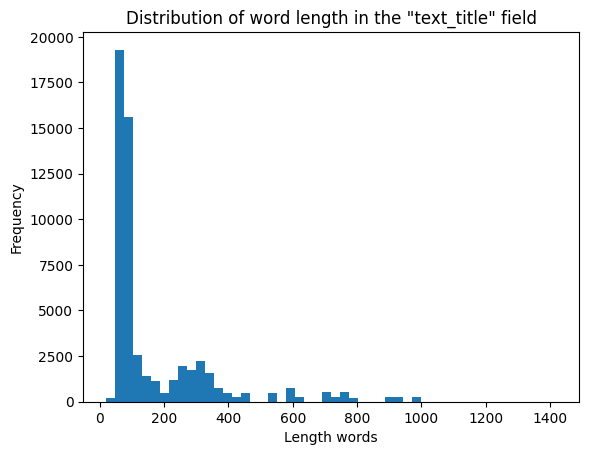

In [ ]:
# Calculates intervals based on word length
counts, bins = np.histogram(word_length, bins=50)

# Plot
plt.hist(word_length, bins=bins)
plt.xlabel('Length words')
plt.ylabel('Frequency')
plt.title('Distribution of word length in the "text_title" field')
plt.show()

The concentration of word length tends to be between 0 and 200.

Using the maximum, taking advantage of padding, would result in uninformative content.

Let us analyze whether there is a correlation of length with the classes

In [ ]:
data['word_length'] = data['text_title'].apply(lambda x: len(x.split()))
data

,title,Day,Month,Year,Weekend,author,text,source_encoded,text_title,word_length
0,"Editorial: Japan govt's 20,000-yen handout mis...",6,12,2021,0,NaN,The Japanese government is trying to boost the...,0,editorial japan govts 20000yen handout misses ...,330
1,Editorial: Time for Japan PM Kishida to delive...,7,12,2021,0,NaN,"Prime Minister Fumio Kishida, who won a public...",0,editorial time japan pm kishida deliver respec...,327
2,"Editorial: 80 years on from Pearl Harbor, acti...",8,12,2021,0,NaN,It has been 80 years since the start of the Pa...,0,editorial 80 years pearl harbor active efforts...,311
3,"Yoroku: 80 years later, many lessons still not...",8,12,2021,0,NaN,"""The world has changed completely. The era was...",0,yoroku 80 years later many lessons still learn...,270
4,Promoting respect for human rights behind US '...,8,12,2021,0,NaN,The U.S. administration under President Joe Bi...,0,promoting respect human rights behind us diplo...,365
...,...,...,...,...,...,...,...,...,...,...
55254,"Rolling Stones open American tour, pay tribute...",27,9,2021,0,NaN,ST. LOUIS (AP) -- The Rolling Stones are touri...,0,rolling stones open american tour pay tribute ...,370
55255,"Yoroku: 80 years later, many lessons still not...",8,12,2021,0,NaN,"""The world has changed completely. The era was...",0,yoroku 80 years later many lessons still learn...,270
55256,"Astronaut Michael Collins, Apollo 11 pilot, de...",29,4,2021,0,NaN,"(AP) -- Apollo 11 astronaut Michael Collins, w...",0,astronaut michael collins apollo 11 pilot dead...,766
55257,News Navigator: What is the Quadrantid meteor ...,30,12,2021,0,NaN,The Mainichi Shimbun answers some common quest...,0,news navigator quadrantid meteor shower expect...,233


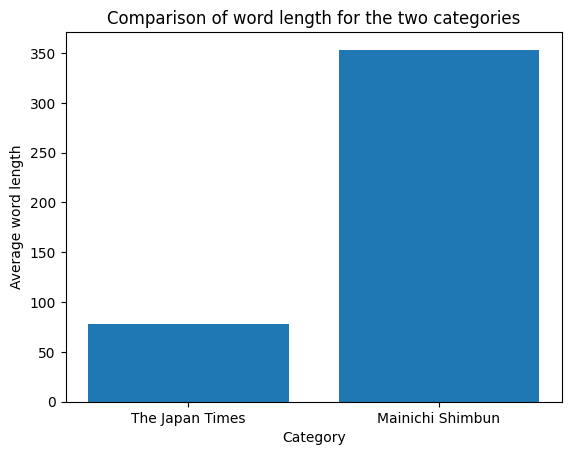

In [ ]:
# Calculating the distribution of word lengths for the two categories.
category1 = data[data['source_encoded'] == 1]['word_length']
category2 = data[data['source_encoded'] == 0]['word_length']

# Plot
plt.bar(['The Japan Times', 'Mainichi Shimbun'], [category1.mean(), category2.mean()])
plt.xlabel('Category')
plt.ylabel('Average word length')
plt.title('Comparison of word length for the two categories')
plt.show()

There is a marked difference, certainly Mainichi Shimbun's texts will cover more complex topics

In [15]:
average_length = 350

Tokenize

In [16]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Extract the column 'text_title' from the dataset.
text_list = data['text_title'].tolist()

# Create a tokenizer and train it on text strings.
tokenizer = Tokenizer(num_words=None)
tokenizer.fit_on_texts(text_list)

# Number of different words in the dataset
num_words = len(tokenizer.word_index) + 1
print('Number of different words in the dataset:', num_words)

Number of different words in the dataset: 86069


**Using the tokenizer we transform the text into numerical format for use in neural networks.**

**We set as padding 350 which is slightly higher than the average word length because I want to keep track of the average minority class.**

In [17]:
tokenizer = Tokenizer(num_words=num_words)
# Fitting on word
tokenizer.fit_on_texts(data['text_title'])
# Tokenize
X = tokenizer.texts_to_sequences(data['text_title'])
# Padding because all records must have a fixed and unique length
X = pad_sequences(X, maxlen=average_length)

In [ ]:
X

array([[   0,    0,    0, ...,   97,  664, 7791],
       [   0,    0,    0, ..., 2245,  554,  622],
       [   0,    0,    0, ...,  295,   10, 5607],
       ...,
       [ 891,  714, 1416, ...,  549,  536, 1044],
       [   0,    0,    0, ...,  459,  143,  274],
       [   0,    0,    0, ...,   65, 3717, 2556]], dtype=int32)

In [ ]:
X.shape

(55136, 350)

# **Build CNN Neural Netowork**

In [96]:
# Model definition
max_words = num_words
max_length = average_length

model = Sequential()
model.add(Embedding(max_words, 5, input_length=max_length))
model.add(Conv1D(10, 7, activation='relu'))
# overfitting
model.add(Dropout(0.7))
model.add(MaxPooling1D(5))
model.add(Conv1D(10, 7, activation='relu'))
# overfitting
model.add(Dropout(0.7))
model.add(GlobalMaxPooling1D())
# overfitting
model.add(Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
# overfitting
model.add(Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01)))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=[Precision(), Recall(), AUC(), BinaryAccuracy()])
model.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_17 (Embedding)    (None, 350, 5)            430345    
                                                                 
 conv1d_34 (Conv1D)          (None, 344, 10)           360       
                                                                 
 dropout_24 (Dropout)        (None, 344, 10)           0         
                                                                 
 max_pooling1d_17 (MaxPoolin  (None, 68, 10)           0         
 g1D)                                                            
                                                                 
 conv1d_35 (Conv1D)          (None, 62, 10)            710       
                                                                 
 dropout_25 (Dropout)        (None, 62, 10)            0         
                                                     

In [20]:
X_data = X
X_data

array([[   0,    0,    0, ...,   97,  664, 7791],
       [   0,    0,    0, ..., 2245,  554,  622],
       [   0,    0,    0, ...,  295,   10, 5607],
       ...,
       [ 891,  714, 1416, ...,  549,  536, 1044],
       [   0,    0,    0, ...,  459,  143,  274],
       [   0,    0,    0, ...,   65, 3717, 2556]], dtype=int32)

In [21]:
y_data = data[['source_encoded']]
y_data

,source_encoded
0,0
1,0
2,0
3,0
4,0
...,...
55254,0
55255,0
55256,0
55257,0


**Splitting data maintaining the 2-to-1 ratio of classes**

In [70]:
from sklearn.model_selection import train_test_split
# Train e test set
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, stratify=y_data, random_state=42)

In [74]:
# Train e validation set
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, stratify=y_train, random_state=42)

In [75]:
y_train.value_counts()

source_encoded
1                 26418
0                 13279
dtype: int64

In [76]:
y_test.value_counts()

source_encoded
1                 7339
0                 3689
dtype: int64

In [77]:
y_val.value_counts()

source_encoded
1                 2935
0                 1476
dtype: int64

# **Training**

Earling stopping if the model does not improve

In [81]:
from keras.callbacks import EarlyStopping

earlystop = EarlyStopping(monitor='val_accuracy', min_delta=0.01, patience=2, verbose=1, mode='auto', baseline=None, restore_best_weights=True)

In [97]:
model.fit(X_train, y_train, epochs=1, batch_size=32, validation_data=(X_val, y_val), callbacks=[earlystop])

1240/1241 [============================>.] - ETA: 0s - loss: 0.0869 - precision_1: 0.9731 - recall_1: 0.9991 - auc: 0.9993 - binary_accuracy: 0.9810

1241/1241 [==============================] - 41s 30ms/step - loss: 0.0869 - precision_1: 0.9731 - recall_1: 0.9991 - auc: 0.9993 - binary_accuracy: 0.9810 - val_loss: 0.4270 - val_precision_1: 1.0000 - val_recall_1: 0.9911 - val_auc: 1.0000 - val_binary_accuracy: 0.9941


# **Evaluating**

In [98]:
# Evaluates the performance of the model on the validation set
scores = model.evaluate(X_val, y_val, verbose=0)
print("Validation loss:", scores[0])
print("Validation precision:", scores[1])
print("Validation recall:", scores[2])
print("Validation AUC:", scores[3])
print("Validation binary accuracy:", scores[4])

Validation loss: 0.4270313084125519
Validation precision: 1.0
Validation recall: 0.9911413788795471
Validation AUC: 1.0
Validation binary accuracy: 0.9941056370735168


In [101]:
y_test

,source_encoded
39475,0
45381,0
22956,1
41370,0
42052,0
...,...
20507,1
30508,1
16367,1
37329,0


In [103]:
y_pred = model.predict(X_test)

y_pred = np.round(y_pred)

from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)

345/345 [==============================] - 4s 11ms/step
Accuratezza del modello: 0.9961008342401161


probably overfitting

# **Build second Neural Network**

In [167]:
import pandas as pd
# Load dataset
preprocessor = PreProcessing('ModellingDataset/sub_over_english_news.csv')
preprocessed_df = preprocessor.apply_preprocessing()

# Load dataset
data_second = preprocessed_df.data_frame

In [168]:
# Pre-processing text

# Convert to lowercase
data_second['text'] = data_second['text'].apply(lambda x: x.lower())
data_second['title'] = data_second['title'].apply(lambda x: x.lower())

# Remove punctuation
data_second['text'] = data_second['text'].str.replace('[^\w\s]','')
data_second['title'] = data_second['title'].str.replace('[^\w\s]','')

# Remove stop words
stop_words = set(stopwords.words('english'))
data_second['text'] = data_second['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))
data_second['title'] = data_second['title'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))


data_second['author_nan'] = data_second['author'].isna().astype(int)

<ipython-input-168-185dc1199b22>:8: FutureWarning: The default value of regex will change from True to False in a future version.
  data_second['text'] = data_second['text'].str.replace('[^\w\s]','')
<ipython-input-168-185dc1199b22>:9: FutureWarning: The default value of regex will change from True to False in a future version.
  data_second['title'] = data_second['title'].str.replace('[^\w\s]','')


In [169]:
data_second = data_second.drop('author', axis=1)

In [170]:
data_second

,title,Day,Month,Year,Weekend,text,source_encoded,author_nan
0,editorial japan govts 20000yen handout misses ...,6,12,2021,0,japanese government trying boost uptake number...,0,1
1,editorial time japan pm kishida deliver respec...,7,12,2021,0,prime minister fumio kishida public mandate ad...,0,1
2,editorial 80 years pearl harbor active efforts...,8,12,2021,0,80 years since start pacific war imperial japa...,0,1
3,yoroku 80 years later many lessons still learn...,8,12,2021,0,world changed completely era enormously severe...,0,1
4,promoting respect human rights behind us diplo...,8,12,2021,0,us administration president joe biden decided ...,0,1
...,...,...,...,...,...,...,...,...
31350,75 foresee snow brand doom poll,7,2,2002,0,seventyfive percent respondents recent interne...,1,1
31351,germany sees weakest growth five years amid gl...,15,1,2019,0,berlin german economy grew 15 percent 2018 wea...,1,1
31352,banks need strong medicine recover ratings sp ...,7,6,2001,0,standard poors corp said wednesday slide japan...,1,1
31353,kremlin twostep modernize marginalize,10,1,2010,1,moscow westerners often see russian politics t...,1,0


In [171]:
X_data_second = data_second[['text']]
y_data_second = data_second[['source_encoded']]

In [172]:
X_data_second

,text
0,japanese government trying boost uptake number...
1,prime minister fumio kishida public mandate ad...
2,80 years since start pacific war imperial japa...
3,world changed completely era enormously severe...
4,us administration president joe biden decided ...
...,...
31350,seventyfive percent respondents recent interne...
31351,berlin german economy grew 15 percent 2018 wea...
31352,standard poors corp said wednesday slide japan...
31353,moscow westerners often see russian politics t...


In [173]:
y_data_second

,source_encoded
0,0
1,0
2,0
3,0
4,0
...,...
31350,1
31351,1
31352,1
31353,1


In [178]:
from sklearn.model_selection import train_test_split
# Train e test set
X_train, X_test, y_train, y_test = train_test_split(X_data_second, y_data_second, test_size=0.2, random_state=42)

In [209]:
model2 = Sequential()
# Text Format
model2.add(InputLayer(input_shape=(1,), dtype=tf.string))
# Auto conversion
model2.add(TextVectorization(max_tokens=max_words, output_sequence_length=max_length))
model2.add(Embedding(max_words, 32, input_length=max_length))
model2.add(Flatten())
model2.add(Dense(128, activation='relu'))
model2.add(Dense(1, activation='sigmoid'))
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model2.summary()

Model: "sequential_31"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization_13 (Text  (None, 350)              0         
 Vectorization)                                                  
                                                                 
 embedding_31 (Embedding)    (None, 350, 32)           2754208   
                                                                 
 flatten_13 (Flatten)        (None, 11200)             0         
                                                                 
 dense_50 (Dense)            (None, 128)               1433728   
                                                                 
 dense_51 (Dense)            (None, 1)                 129       
                                                                 
Total params: 4,188,065
Trainable params: 4,188,065
Non-trainable params: 0
___________________________________________

In [210]:
model2.layers[0].adapt(X_train)

In [211]:
model2.fit(X_train, y_train, epochs=1, batch_size=32, validation_data=(X_test, y_test))

783/783 [==============================] - 70s 88ms/step - loss: 0.0107 - accuracy: 0.9965 - val_loss: 3.5053e-04 - val_accuracy: 0.9998


In [212]:
model2.predict(["80 years since start pacific war imperial japa.."])[0][0]

1/1 [==============================] - 0s 203ms/step


0.9998094

In [216]:
y_pred = model2.predict(np.array(["japanese ferry carrying 490 passengers went ad"]))

# Classes
class_index = np.argmax(y_pred, axis=1)[0]
class_index

1/1 [==============================] - 0s 93ms/step


0

# **The overfitting surely is due to the fact that I am not treating the dataset properly**